### 데이터 준비하기 - **exchange.csv**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from encodings import euc_kr
import seaborn as sns

In [2]:
### kospi / kospi_date(다른 데이터와 merge할)
kospi = pd.read_csv('./data/kospi_국면분석.csv',encoding = 'euc-kr')
kospi_date = kospi[['날짜']]
kospi_date['날짜'] = pd.to_datetime(kospi_date['날짜'], format="%Y/%m/%d")

### exchange
exchange = pd.read_csv('./data/exchange.csv',encoding = 'euc-kr')
exchange['날짜'] = pd.to_datetime(exchange['날짜'],format = '%Y/%m/%d')
exchange = kospi_date.merge(exchange,how = 'left',on='날짜')

### market
market = pd.read_csv('./data/market.csv',encoding = 'euc-kr')
#market[market['날짜']=='2001-01-02']
market = market.iloc[261:,:].reset_index().drop('index',axis = 1)
market['날짜'] = pd.to_datetime(market['날짜'],format = '%Y/%m/%d')
market = kospi_date.merge(market,how = 'left',on='날짜')

### per
per = pd.read_csv('./data/per.csv',encoding = 'euc-kr')
per['날짜'] = pd.to_datetime(per['날짜'],format = '%Y/%m/%d')
per = kospi_date.merge(per,how = 'left',on='날짜')

C:\Users\cau\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [3]:
# 시각화를 위한 준비

import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,5)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

# 이상치 처리하기

## exchange

#### USD

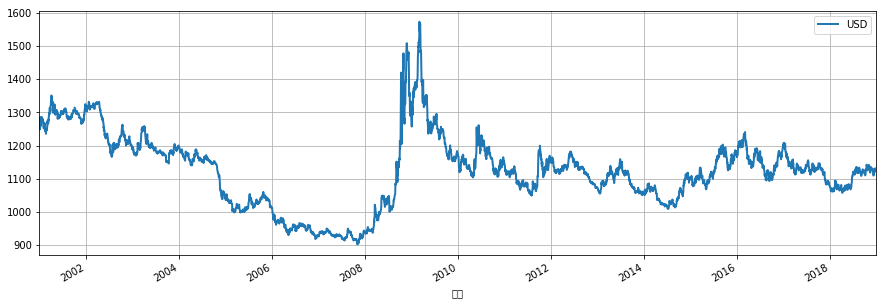

In [13]:
# 원본 데이터 분포 확인
exchange[['날짜','USD']].plot(x='날짜')

> 이상치로 보이는 값 없음

#### EUR

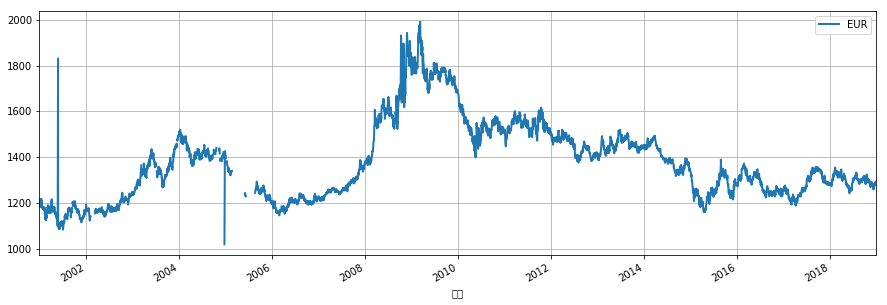

In [14]:
# 원본 데이터 분포 확인
exchange[['날짜','EUR']].plot(x='날짜')

> 결측치가 다수 존재하는 것으로 보이며 이상치가 존재하는 것으로 보임

In [5]:
# (1) 2001년 ~ 2002년 사이 이상치
exchange[exchange['EUR']>1800].head(5) # 98 2001-05-28 # 실제값 1107.53  # 출처: 한국은행경제통계시스템

# 바꾸기
exchange.iloc[98,2]=1107.53
exchange.iloc[98,2]

1107.53

In [6]:
# (2) 2004년 ~ 2006년 사이 이상치
exchange[exchange['EUR']<1100].tail(5) # 981 2004-12-24  # 실제값 1419.43  # 출처: 한국은행경제통계시스템

# 바꾸기
exchange.iloc[981,2]=1419.43
exchange.iloc[981,2]

1419.43

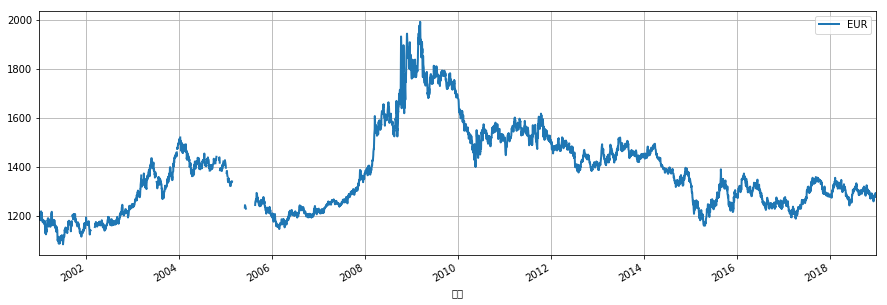

In [23]:
# 수정 후 데이터 분포 확인
exchange[['날짜','EUR']].plot(x='날짜')

#### CNY

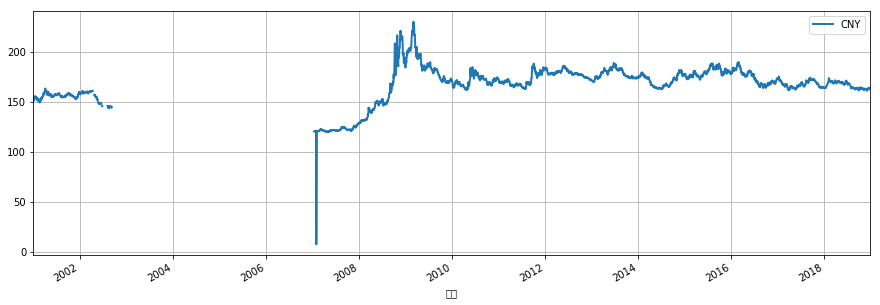

In [10]:
# 원본 데이터 분포 확인
exchange[['날짜','CNY']].plot(x='날짜')

> 일정 구간이 결측치 값으로 데이터가 존재하지 않으며, 2007년 부근에 이상치가 존재하는 것으로 보임

In [7]:
# (1) 2006년 ~ 2008년 사이 이상치
exchange[exchange['CNY']<100].head() # 1505 2007-02-02 # 실제값 120.87

# 바꾸기
exchange.iloc[1505,3]=120.87
exchange.iloc[1505,3]

120.87

In [8]:
# (2) 2002년 이상치
exchange[exchange['CNY']<100] # 362 2002-06-25 # 실제값 없음

# 결측치 처리
exchange.iloc[362,3]=np.nan
exchange.iloc[362,3]

nan

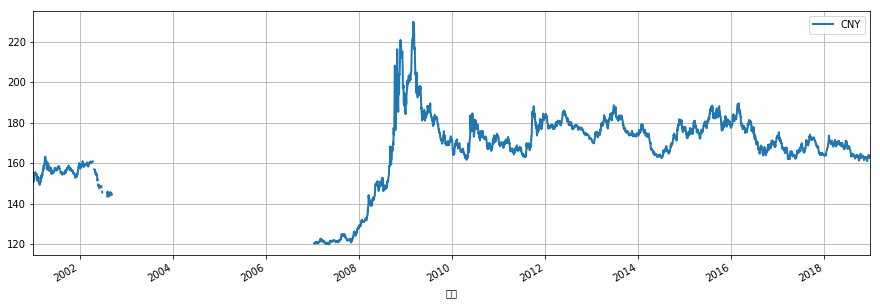

In [28]:
# 수정 후 데이터 분포 확인
exchange[['날짜','CNY']].plot(x='날짜')

#### JPY

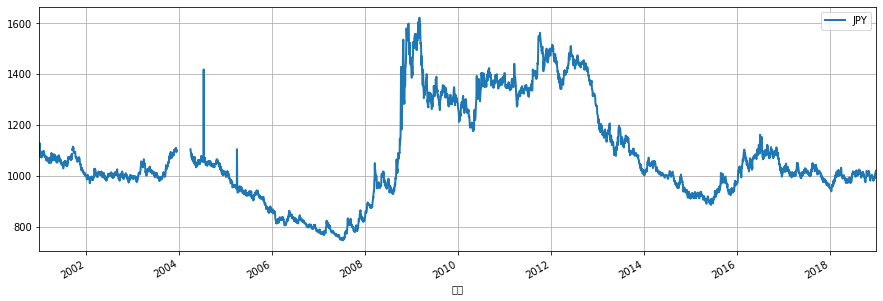

In [9]:
# 원본 데이터 분포 확인
exchange[['날짜','JPY']].plot(x='날짜')

> 결측치가 존재하는 것으로 보이며 2005년 근처에 이상치가 존재하는 것으로 보임

In [10]:
# (1) 2003년 ~ 2005년 사이 이상치
exchange[exchange['JPY']>1400].head() # 337 2002-04-20 #실제값 1005.52 # 913  2004-07-14  #실제값 1059.97

# 바꾸기
#exchange.iloc[337,4] = 1005.52
exchange.iloc[867,4] = 1059.97
#exchange.iloc[913,4]

In [11]:
# (2) 2005년 이상치
exchange[exchange['JPY']>1100] # 1094 2005-03-01 #실제값 949.56

# 바꾸기
exchange.iloc[1046,4]=949.56
#exchange.iloc[1094,4]

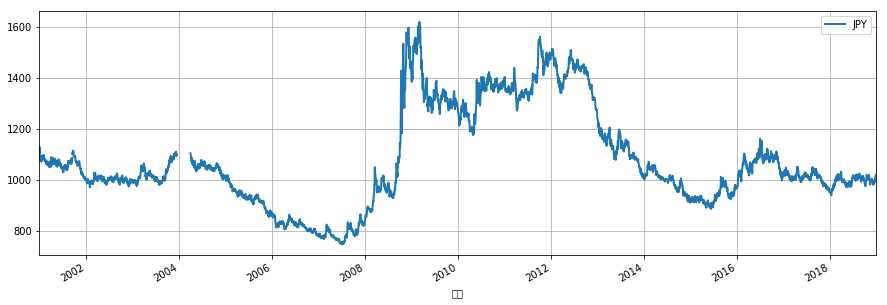

In [33]:
# 수정 후 데이터 분포 확인
exchange[['날짜','JPY']].plot(x='날짜')

#### GBP

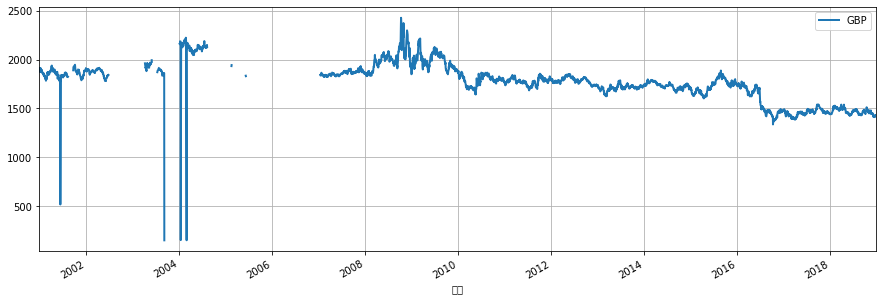

In [12]:
# 원본 데이터 분포 확인
exchange[['날짜','GBP']].plot(x='날짜')

> 결측치와 이상치가 다수 존재하는 것으로 보임

In [13]:
# 2001년 ~ 2005년 사이 이상치
exchange[exchange['GBP']<1000]

# 115 2001-06-15 # 1809.03
# 705 2003-09-09 # 1857.66
# 792 2004-01-16 # 2166.11
# 820 2004-03-02 # 2199.64

날짜     USD      EUR     CNY      JPY     GBP
111 2001-06-15  1291.7  1114.61  156.05  1064.09  517.33
661 2003-09-09  1172.8  1298.11     NaN  1005.62  150.37
747 2004-01-16  1187.4  1495.59     NaN      NaN  152.95
775 2004-03-02  1176.5  1465.62     NaN      NaN  151.15

In [14]:
# 바꾸기
exchange.iloc[111,5] = 1809.03
exchange.iloc[661,5] = 1857.66
exchange.iloc[747,5] = 2166.11
exchange.iloc[775,5] = 2199.64

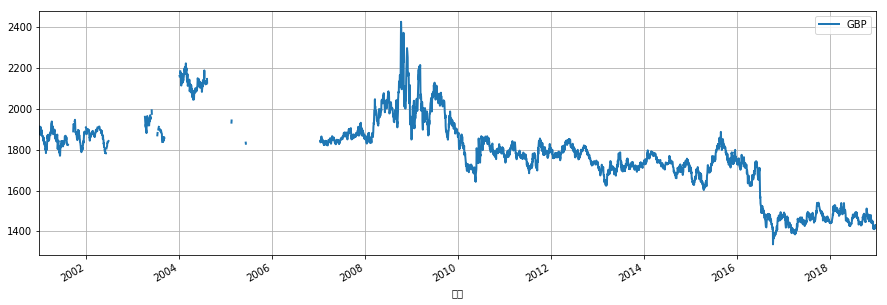

In [36]:
# 수정 후 데이터 분포 확인
exchange[['날짜','GBP']].plot(x='날짜')

# 결측치 처리하기 _ (market , per , economic, exchange)

- 결측치 = NaN
- 특정 구간이 통째로 결측치 
- USD를 제외한 모든 변수에 결측치가 존재

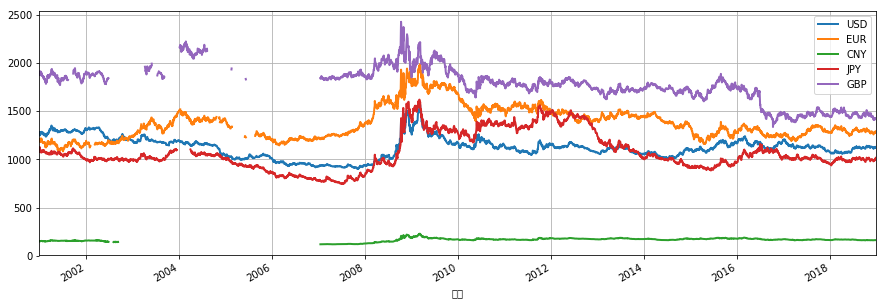

In [37]:
%matplotlib inline
import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,5)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

exchange.plot(x='날짜')

- 결측치의 분포가 데이터 상에 구간화되어있는 것을 확인할 수 있다.
- 단순하게 i-1번째와 i+1번째의 평균으로 결측치 처리를 할 수 없다.

#### 결측치 처리 방법 후보
1. 버린다
2. 전체 평균으로 채운다
3. 구간의 앞뒤 평균으로 채운다

**특정 구간의 결측치를 예측하는 방향으로 간다 => 시계열 예측**

## 시계열 예측 할 수 있을까? fear.ML
### ARIMA

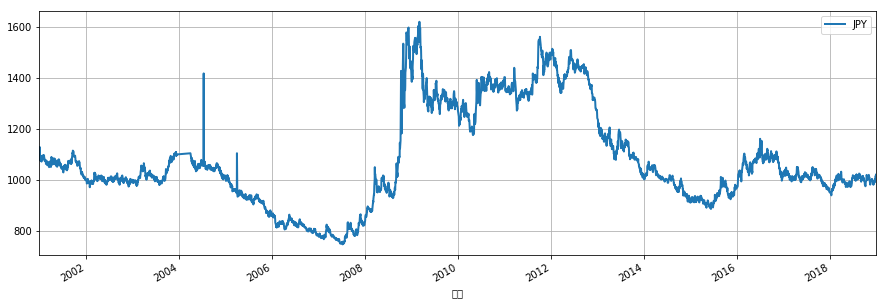

In [60]:
## jpy 데이터 준비
data_jpy = exchange[exchange['JPY'].isnull()==False]
data_jpy = data_jpy[['날짜','JPY']]
data_jpy
data_jpy.plot(x='날짜')

- tag 600정도에서 자기상관이 양에서 음으로 변한다 -> 따라서 p=0
- 1차 차분 후에 다시 확인한다
[참고](https://byeongkijeong.github.io/ARIMA-with-Python/)

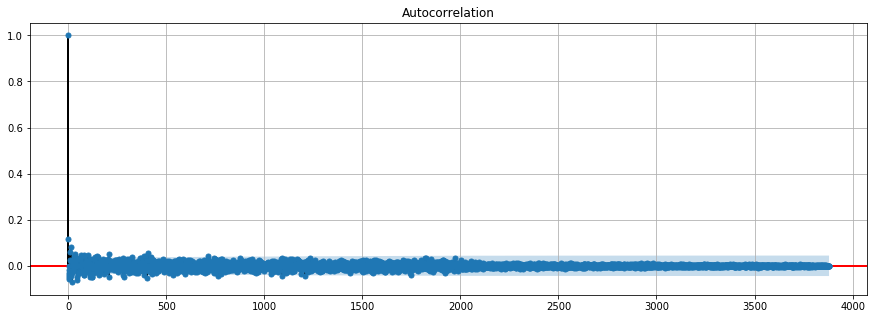

In [378]:
diff_1=data_jpy.iloc[:,1].diff(periods=1).iloc[1:]
#diff_1.plot()
plot_acf(diff_1)
plt.show()

> autocollinearity를 띄던 분포가 non-autocollinearity를 띄는 것으로 변환됨 -> 차분 d = 1 이 적절하다

In [355]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_jpy.iloc[:,1], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 3881
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -14816.429
Method:                       css-mle   S.D. of innovations             11.009
Date:                Sat, 02 Nov 2019   AIC                          29638.858
Time:                        16:56:21   BIC                          29657.649
Sample:                             1   HQIC                         29645.529
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0170      0.199     -0.085      0.932      -0.408       0.374
ma.L1.D.JPY     0.1286      0.016      7.840      0.000       0.096       0.161
                                    Roots       

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [356]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_jpy.iloc[:,1], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 3881
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -14816.433
Method:                       css-mle   S.D. of innovations             11.009
Date:                Sat, 02 Nov 2019   AIC                          29636.865
Time:                        16:56:27   BIC                          29649.393
Sample:                             1   HQIC                         29641.313
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.JPY     0.1286      0.016      7.840      0.000       0.096       0.161
                                    Roots                                    
                  Real          Imaginary         

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


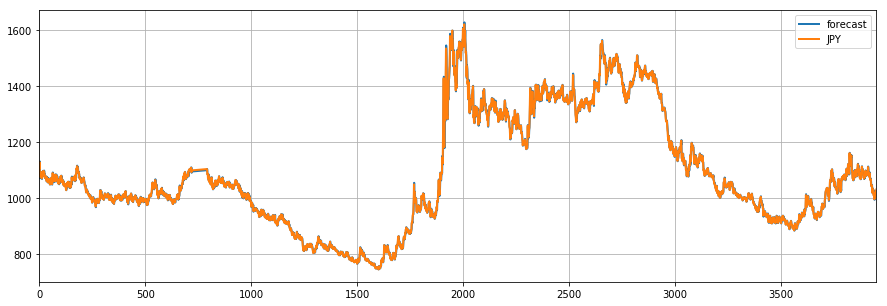

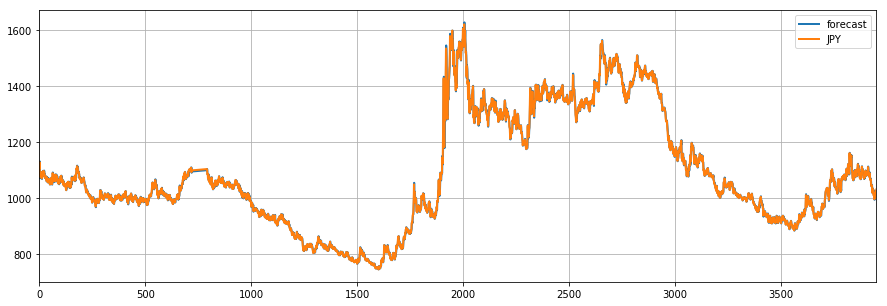

In [287]:
model_fit.plot_predict()

In [288]:
fore = model_fit.forecast(steps=1)
fore=float(fore[0])
fore = round(fore,2)
fore

1032.38

## ARIMA로 결측치 예측하는 모듈 만들기

> nan을 포함하지 않은 전체 모형의 추이가 (0,1,1) parameter에 적절하다고 판단하여 파라미터를 다음과 같이 설정. 자동화 모듈을 만든다

1. 데이터를 받는다.(날짜와 quantity변수가 포함된 n*2 dataframe형식)
2. 데이터의 Nan를 찾고 NaN가 나타날 때마다 데이터를 자른다
3. 잘라낸 데이터(nan이 없는 데이터)로 ARIMA 모델을 학습시킨 후 예측값을 출력한다.
4. 예측값을 빈 리스트에 저장한다
5. 더이상 nan이 나타나지 않고 data의 length까지 도달할 경우 반복을 멈춘다
6. 결과 리스트를 NaN 위치에 대체하고 new data를 저장한다
7. new data를 반환한다

In [211]:
def fill_na_ARIMA(x):
    # 1. 데이터 받기 - col하나만 가지고 있는 데이터 ex)exchange['JPY'] - pd.Series형식
    # 2. NaN 찾아내기
    i = 0
    while x.iloc[:,1].isnull().sum() > 0:
        if x.iloc[:,1].isnull()[i]==True:
            # 3. nan발견하면 데이터 자르기
            train = x.iloc[:,1]
            train = train[:i]
            # 
            model = ARIMA(train, order=(0,1,1))
            model_fit = model.fit(trend='nc',full_output=True, disp=1)
            fore = model_fit.forecast(steps=1)
            pred = float(fore[0])
            pred = round(pred,2)
            x.iloc[i,1] = pred
            i = 0
            continue
        else:
            i += 1    
    return x

In [277]:
new_EUR = fill_na_ARIMA(exchange[['날짜','EUR']])

C:\Users\genie\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [278]:
new_EUR.isnull().sum()

날짜     0
EUR    0
dtype: int64

In [59]:
plt.plot(new_EUR)
plt.plot(exchange[['EUR']])
plt.show()

NameError: name 'new_EUR' is not defined

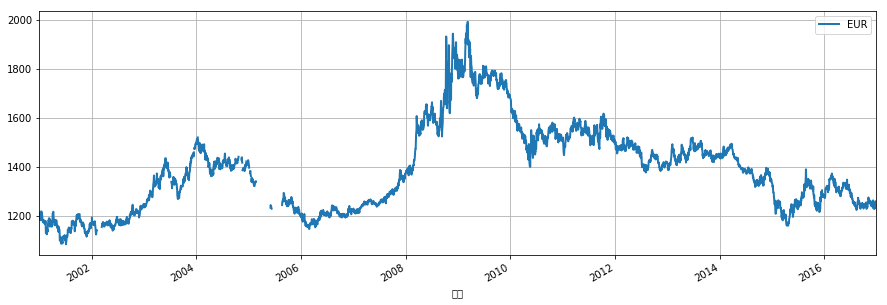

In [280]:
# 원본 데이터
exchange[['날짜','EUR']].plot(x = '날짜')

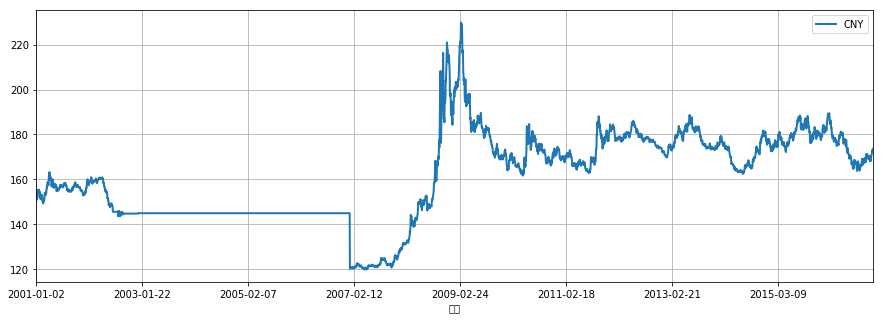

In [1442]:
new_CNY.plot(x='날짜')

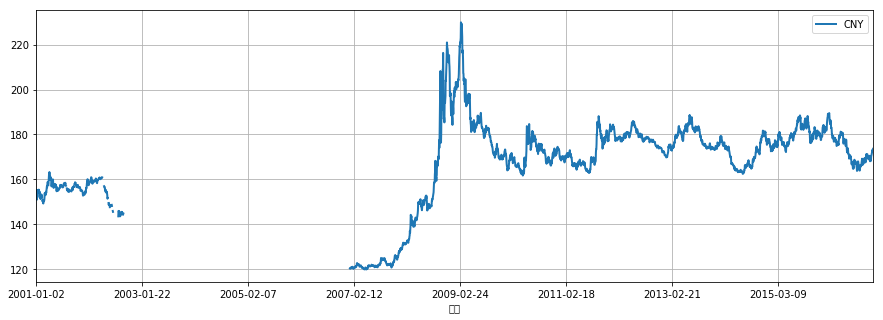

In [360]:
# 원본 데이터
exchange[['날짜','CNY']].plot(x = '날짜')

In [329]:
## JPY
new_JPY = fill_na_ARIMA(exchange[['날짜','JPY']])

In [330]:
new_JPY.isnull().sum()

날짜     0
JPY    0
dtype: int64

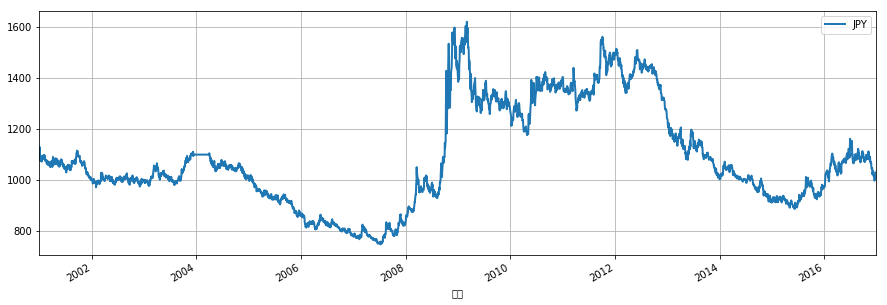

In [331]:
new_JPY.plot(x='날짜')

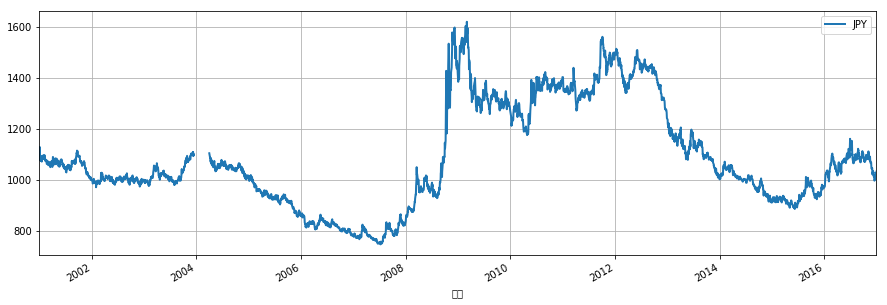

In [332]:
# 원본 데이터
exchange[['날짜','JPY']].plot(x = '날짜')

In [333]:
## GBP
new_GBP = fill_na_ARIMA(exchange[['날짜','GBP']])

In [334]:
new_GBP.isnull().sum()

날짜     0
GBP    0
dtype: int64

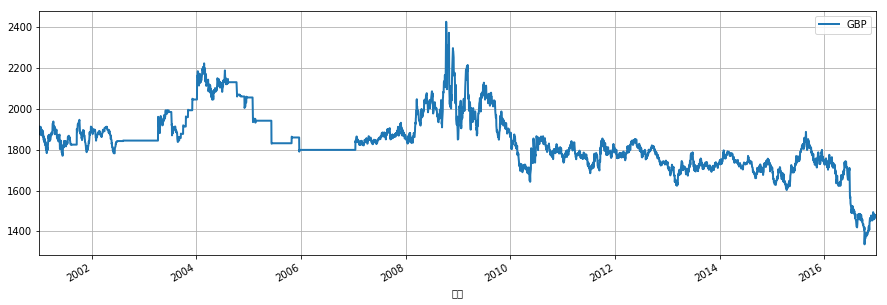

In [335]:
new_GBP.plot(x='날짜')

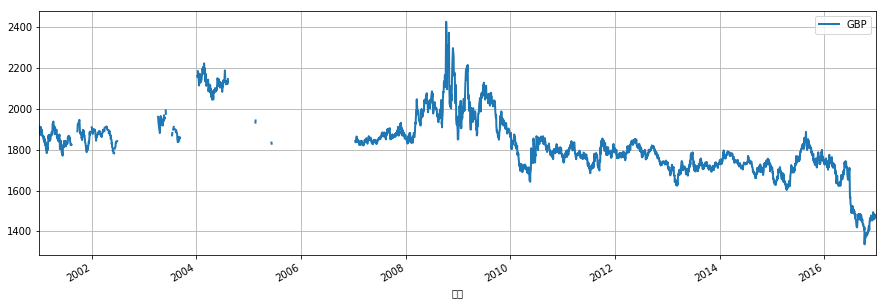

In [336]:
# 원본 데이터
exchange[['날짜','GBP']].plot(x = '날짜')

## VAR 모델 적용

### VAR
    - 다변량 시계열 모델

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E0BEF9BE0>,
      dtype=object)

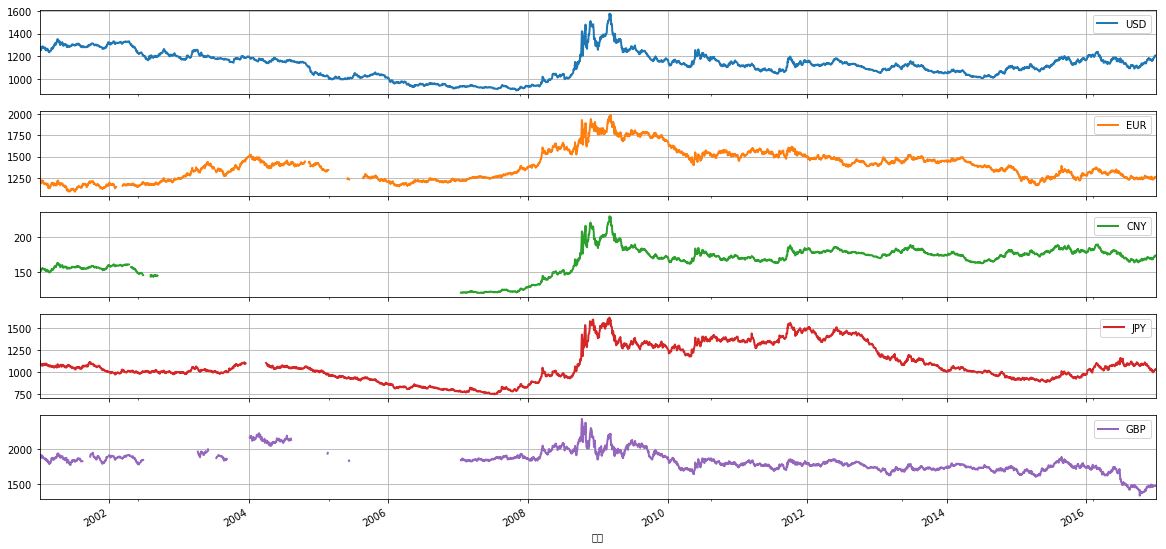

In [1445]:
# 전체 데이터셋의 분포를 확인
plb.rcParams['figure.figsize'] = (20,10)
exchange.plot(x= '날짜',subplots= True)

#### dropna로 결측값을 포함하지 않는 데이터만 가지고 VAR 분석

In [783]:
from statsmodels.tsa.vector_ar.var_model import VAR

# na가 없는 데이터
exchange_no_na = exchange.dropna()

# 날짜가 없는 데이터
exchange_var = np.asarray(exchange_no_na.drop('날짜',axis = 1))

# VAR 분석
mvar = sm.tsa.VAR(exchange_var)
resvar = mvar.fit()
print(resvar.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Nov, 2019
Time:                     14:52:51
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    16.1433
Nobs:                     2742.00    HQIC:                   16.1020
Log likelihood:          -41467.4    FPE:                9.61240e+06
AIC:                      16.0786    Det(Omega_mle):     9.50792e+06
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         6.559053         3.337514            1.965           0.049
L1.y1         0.995278         0.003296          301.925           0.000
L1.y2        -0.000785         0.002303           -0.341           0.733
L1.y3         0.010034

##### 변수 USD(y1) EUR(y2) CNY(y3) JPY(y4) GBP(y5) 에 대한 VAR 분석 결과

- EUR(y2)에 유의한 변수: 없음 - 상관계수 : y5
- CNY(y3)에 유의한 변수: 

## VAR로 결측치 예측하는 모듈 만들기

> 변수간의 상관관계를 분석한 결과, exchange안의 모든 변수들이 서로 상관관계를 가지고 있다고 판단. -> VAR로 변수간의 상관관계를 포함한 시계열 예측을 시행한다

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

def fill_na_VAR(x): 
    # 1. 모든 변수를 포함한 데이터 
    ### 1-1. 날짜를 제외한 데이터를 만든다
    data = x.drop('날짜', axis = 1) ## type:DataFrame
    ### 1-2. 필요한 변수 설정하기
    total_na = data.isnull().sum().sum() # 데이터 전체 na개수 총합 ## type:int
    n_row = data.shape[0] # 데이터 row 개수 ## type:int
    n_col = data.shape[1] # 데이터 col 개수 ## type:int
    
    # 2. NaN 찾아내기
    while total_na > 0: # na가 존재한다는 전제 하에
        for i in range(n_row): # row를 기준으로 for loop
            irow_na = data.iloc[i,:].isnull().sum() # i번째 행의 na개수 총합 ## type:int
            #print(irow_na)
            
            if irow_na != 0: # i번째 행에 na가 존재하면
                # 3. nan발견하면 데이터 자르기
                train = data.iloc[:i,:] # type:DataFrame
                #print(train)
                train_ar = np.asarray(train) # type:np.array (i-1*n_col)
                #print(train_ar)

                # 4. VAR 분석 -> 함수로 만들기
                var = sm.tsa.VAR(train_ar)
                resvar = var.fit()
                pred = resvar.forecast(resvar.y, 1) # type:np.array (1*n_col)
                #print(pred)
                for j in range(n_col): # col 기준으로
                    if data.iloc[i,:].isnull()[j]: # numeric변수만 담긴 데이터의 i*j위치의 값이 na이면 ## type:bool
                        #print((i,j))
                        # 5. 필요한 예측값만 뽑아오기
                        ans = pred[0,j] # pred의 j번째 값 가져오기 ## type:float64
                        ans = round(ans,2) # type:float64
                        #print(ans)
                        # 6. 해당 위치에 대체하기
                        data.iloc[i,j] = np.nan_to_num(ans) # type:float64
                        #print(data.iloc[i,j])
                continue
        break
    
    final = pd.concat([x['날짜'],data], axis = 1) 
    final['날짜'] = pd.to_datetime(final['날짜'], format="%Y/%m/%d") # 날짜 format 변경 object->datetime
    
    return final ## type:DataFrame

In [634]:
sample = exchange.iloc[:35,:]
#sample.iloc[15,3]
#sample.iloc[i,:].isnull()[j]
sample.iloc[15,:].isnull()[3]

True

In [636]:
fill_na_VAR(sample)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
       USD      EUR     CNY      JPY      GBP
0   1259.7  1185.38  152.19  1099.07  1885.02
1   1267.8  1205.49  153.15  1108.07  1903.35
2   1285.4  1193.24  155.29  1128.53  1914.15
3   1249.3  1190.90  150.92  1078.01  1876.82
4   1267.8  1215.06  153.16  1088.71  1906.33
5   1264.6  1196.69  152.77  1088.67  1892.98
6   1257.9  1187.39  151.97  1074.67  1873.01
7   1261.6  1181.93  152.42  1083.57  1876.19
8   1276.6  1214.30  154.24  1082.41  1911.20
9   1281.2  1218.23  154.79  1078.50  1895.09
10  1285.9  1212.15  155.37  1079.91  1898.37
11  1284.4  1210.48  155.18  1091.06  1891.21
12  1277.2  1194.76  154.32  1071.25  1881.44
13  1286.5  1213.11  155.44  1090.44  1895.01
14  1276.7  1193.91  154.26  1094.05  1869.09
[[1259.7  1185.38  152.19 1099.07 1885.02]
 [1267.8  1205.49  153.15 1108.07 1903.35]
 [1285.4  1193.24  155.29 1128.53 1914.15]
 [1249.3  1190.9   150.92 1078.01 1876.82]
 [1267.8  1215.06  153.16 1088.71 1906.33]
 [1264.6  1196.69

USD      EUR     CNY      JPY      GBP
0   1259.7  1185.38  152.19  1099.07  1885.02
1   1267.8  1205.49  153.15  1108.07  1903.35
2   1285.4  1193.24  155.29  1128.53  1914.15
3   1249.3  1190.90  150.92  1078.01  1876.82
4   1267.8  1215.06  153.16  1088.71  1906.33
5   1264.6  1196.69  152.77  1088.67  1892.98
6   1257.9  1187.39  151.97  1074.67  1873.01
7   1261.6  1181.93  152.42  1083.57  1876.19
8   1276.6  1214.30  154.24  1082.41  1911.20
9   1281.2  1218.23  154.79  1078.50  1895.09
10  1285.9  1212.15  155.37  1079.91  1898.37
11  1284.4  1210.48  155.18  1091.06  1891.21
12  1277.2  1194.76  154.32  1071.25  1881.44
13  1286.5  1213.11  155.44  1090.44  1895.01
14  1276.7  1193.91  154.26  1094.05  1869.09
15  1270.9  1175.26  154.99  1084.48  1891.02
16  1275.3  1178.06  154.05  1084.48  1863.15
17  1279.5  1174.52  154.56  1096.17  1867.43
18  1265.5  1172.68  152.86  1093.78  1851.05
19  1261.3  1181.65  152.37  1081.22  1847.17
20  1259.7  1180.97  152.19  1090.41  1860.45
21  1251.9  1172.72  151.24  1081.79  1839.29
22  1258.6  1180.13  152.06  1096.58  1855.37
23  1257.0  1170.20  151.87  1095.71  1835.60
24  1263.4  1173.51  152.65  1087.54  1835.15
25  1268.8  1166.03  153.31  1086.63  1833.04
26  1261.3  1167.02  152.40  1073.68  1822.64
27  1265.2  1179.10  152.85  1077.22  1838.97
28  1256.4  1156.08  151.80  1076.15  1824.29
29  1252.1  1149.37  152.26  1077.08  1821.74
30  1246.9  1128.88  150.64  1078.59  1806.76
31  1242.4  1134.12  150.10  1070.71  1798.37
32  1248.0  1149.60  150.79  1075.63  1806.17
33  1243.3  1131.84  150.22  1075.33  1798.25
34  1235.7  1124.30  149.29  1061.73  1783.73

In [16]:
exchange_final = fill_na_VAR(exchange)

In [17]:
exchange_final.head(5)

날짜     USD      EUR     CNY      JPY      GBP
0 2001-01-02  1259.7  1185.38  152.19  1099.07  1885.02
1 2001-01-03  1267.8  1205.49  153.15  1108.07  1903.35
2 2001-01-04  1285.4  1193.24  155.29  1128.53  1914.15
3 2001-01-05  1249.3  1190.90  150.92  1078.01  1876.82
4 2001-01-08  1267.8  1215.06  153.16  1088.71  1906.33

In [18]:
exchange_final.isnull().sum()

날짜     0
USD    0
EUR    0
CNY    0
JPY    0
GBP    0
dtype: int64

### 결측치를 채운 데이터 확인

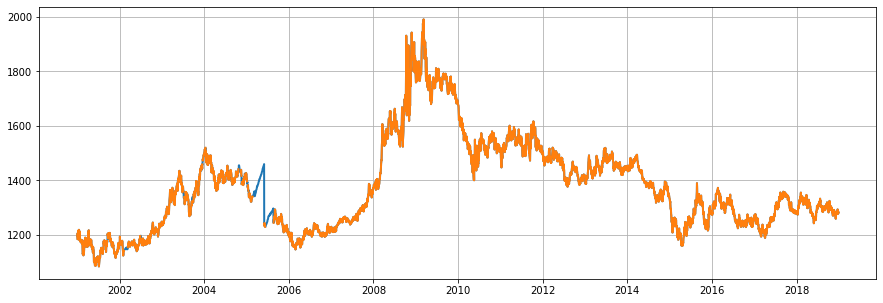

In [19]:
# EUR
plb.rcParams['figure.figsize'] = (15,5)
plt.plot(exchange_final[['날짜']],exchange_final[['EUR']])
plt.plot(exchange_final[['날짜']],exchange[['EUR']])
plt.show()

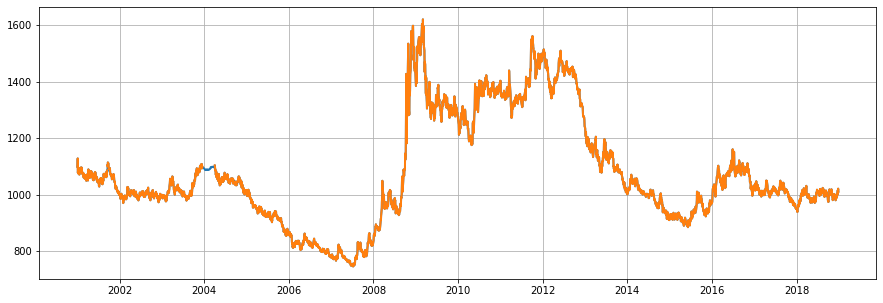

In [20]:
# JPY
plt.plot(exchange_final[['날짜']],exchange_final[['JPY']])
plt.plot(exchange_final[['날짜']],exchange[['JPY']])
plt.show()

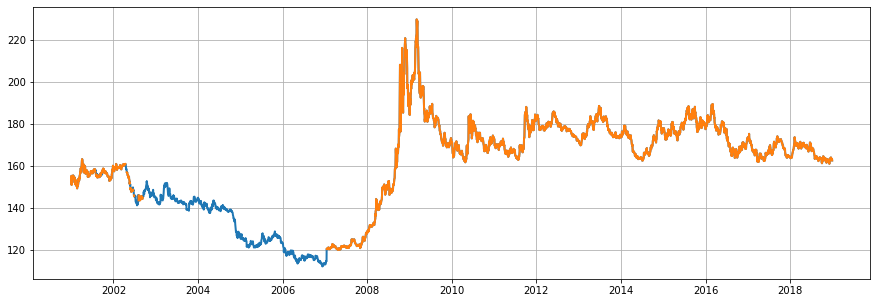

In [21]:
# CNY
plt.plot(exchange_final[['날짜']],exchange_final[['CNY']])
plt.plot(exchange_final[['날짜']],exchange[['CNY']])
plt.show()

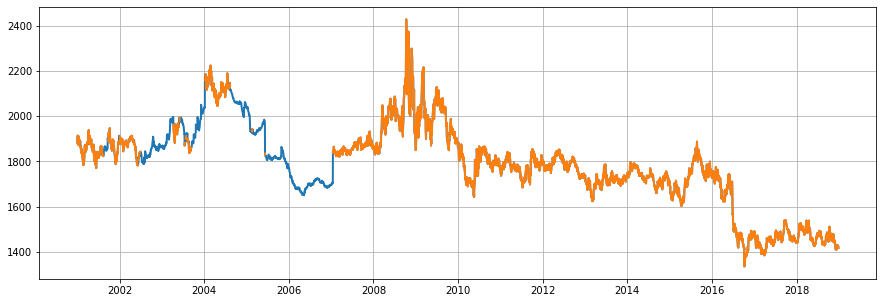

In [22]:
# GBP
plt.plot(exchange_final[['날짜']],exchange_final[['GBP']])
plt.plot(exchange_final[['날짜']],exchange[['GBP']])
plt.show()

In [23]:
exchange_final.isnull().sum()

날짜     0
USD    0
EUR    0
CNY    0
JPY    0
GBP    0
dtype: int64

## 결측치 처리한 데이터 내보내기

In [43]:
exchange_final.to_csv('exchange_final.csv',index=False,encoding = 'euc-kr')

## 다른 데이터셋 처리하기
### market

In [24]:
market.isnull().sum()

날짜                    0
A등급 구리(현물)          110
니켈(현물)              111
알루미늄 99.7%(현물)      109
금괴(일간)               26
미국1년                145
미국3년                128
미국10년                73
국고채권(1년)              0
국고채권(3년)              0
국고채권(10년)             0
Dram Exchange 지수    263
브랜트유 가격              51
원유 WTI              126
dtype: int64

> 결측값이 다수 존재하며 결측치가 NaN형태임을 알 수 있다

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E0C492978>,
      dtype=object)

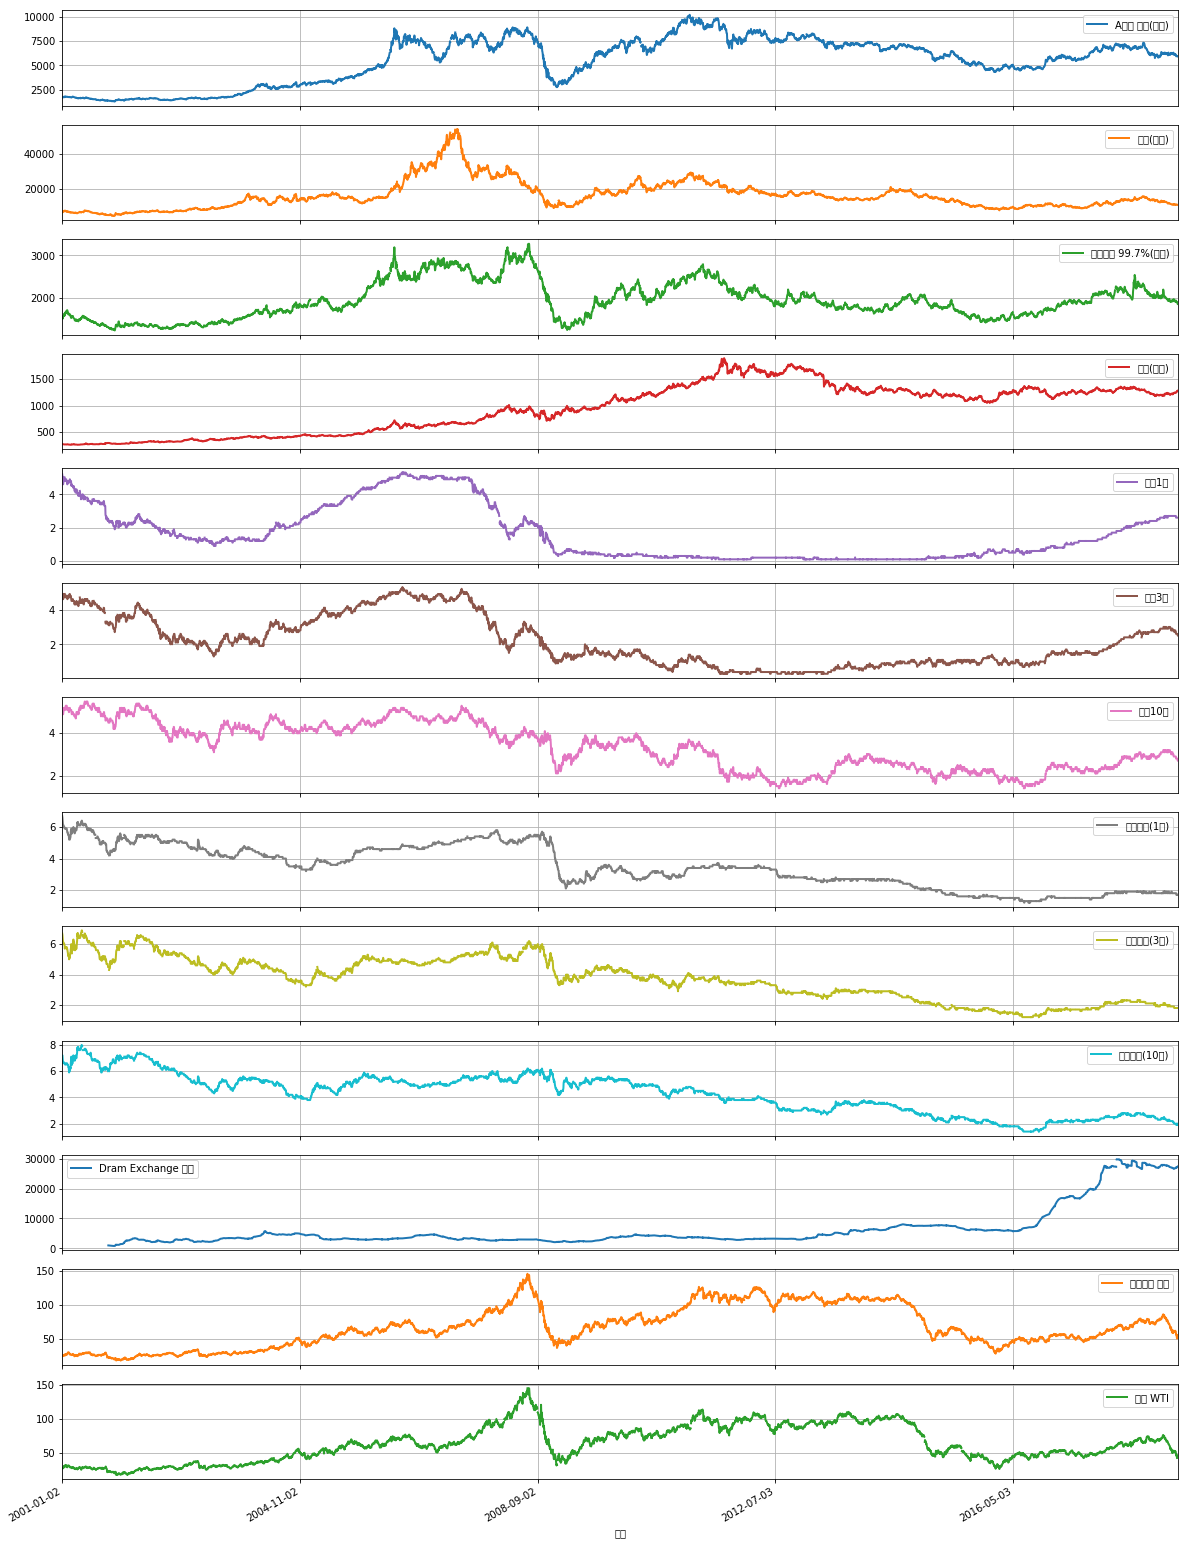

In [1451]:
import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (20,30)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

market.plot(subplots = True, x = '날짜')

- 1~3번째 변수 **A등급 구리(현물)** 과 **니켈**, **알루미늄 99.7%(현물)** 변수의 분포가 매우 흡사한 것을 알 수 있다. 세 가지 변수의 상관관계가 매우 높을 것으로 예상.
- 5~10번째 변수 **미국1년**, **미국3년**, **미국10년**, **국고채권(1sus)**, **국고채권(3년)**, **국고채권(10년)** 의 분포가 매우 흡사한 것을 알 수 있다. 미국채권을 기준으로 5~7번째 변수를 (각각 **1년, 3년, 10년**)으로 묶고, 국고채권을 기준으로 8~10번째 변수를 동일하게 묶은 후 **미국채권**과 **국고채권**의 흐름을 비교했을 때 매우 상관관계가 높음을 예상할 수 있다.
- 12~13번째 변수 **브랜트유 가격**과 **원유 WTI**가 거의 동일한 분포를 띄는 것을 확인할 수 있다. 두 변수간의 높은 상관관계를 예상할 수 있다.

> 전체적인 형태를 살펴본 결과, 특별한 이상치는 확인되지 않았고 결측치 처리가 필요함을 알 수 있다.

#### 요주의 변수: Dram Exchange 지수

- 2001년 ~ 2002년 사이의 일정 구간 데이터가 존재하지 않음 -> fill_na_VAR을 사용할 수 없음 -> Dram Exchange를 제외한 채 VAR을 돌린다

### VAR 모듈로 자동 결측치 처리 (Dram Exchange 지수 제외)

In [25]:
market_noDram = market.drop('Dram Exchange 지수', axis = 1)

In [782]:
# 결측치가 없는 데이터로 var 결과 확인하기

market_noDram_var = market_noDram.dropna()
market_noDram_var = np.asarray(market_noDram_var.drop('날짜',axis = 1))

# VAR 분석
mvar = sm.tsa.VAR(market_noDram_var)
resvar = mvar.fit()
print(resvar.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Nov, 2019
Time:                     14:49:11
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -1.82707
Nobs:                     3742.00    HQIC:                  -1.99434
Log likelihood:          -59655.8    FPE:                   0.124098
AIC:                     -2.08668    Det(Omega_mle):        0.119040
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         18.620385        28.826848            0.646           0.518
L1.y1          0.990642         0.003917          252.898           0.000
L1.y2          0.000957         0.000467            2.049           0.040
L1.y3         -0.

In [975]:
market_noDram_final = fill_na_VAR(market_noDram)

In [744]:
market_noDram_final

날짜  A등급 구리(현물)    니켈(현물)  알루미늄 99.7%(현물)  금괴(일간)  미국1년  미국3년  \
0    2001-01-02     1746.30   6935.00         1552.50   270.6  5.20  4.80   
1    2001-01-03     1716.80   6370.00         1515.50   267.5  5.10  4.90   
2    2001-01-04     1750.50   6569.00         1519.00   267.7  4.90  4.80   
3    2001-01-05     1740.30   6607.00         1527.50   268.2  4.60  4.60   
4    2001-01-08     1775.00   6734.00         1578.00   268.3  4.60  4.60   
5    2001-01-09     1783.30   6796.00         1572.30   267.4  4.70  4.70   
6    2001-01-10     1779.80   6947.00         1591.00   266.3  4.90  4.80   
7    2001-01-11     1795.00   7140.00         1597.50   263.9  4.90  4.80   
8    2001-01-12     1807.50   7325.00         1632.50   264.3  5.00  4.90   
9    2001-01-15     1800.80   7145.00         1626.00   263.6  5.18  5.05   
10   2001-01-16     1754.00   6995.00         1587.00   264.5  5.00  4.90   
11   2001-01-17     1776.00   7320.00         1609.00   263.6  4.90  4.80   
12   2001-01-18     1835.00   7415.00         1661.00   264.7  4.80  4.70   
13   2001-01-19     1823.00   7278.00         1648.50   264.6  4.80  4.80   
14   2001-01-22     1834.80   7265.00         1642.50   265.9  4.80  4.80   
15   2001-01-23     1828.00   7089.00         1659.00   266.2  4.90  4.80   
16   2001-01-24     1799.80   7080.00         1644.50   264.7  4.90  4.80   
17   2001-01-25     1801.50   7005.00         1661.00   264.7  4.90  4.80   
18   2001-01-26     1796.00   6720.00         1700.00   263.8  4.80  4.80   
19   2001-01-29     1781.50   6780.00         1686.00   263.0  4.80  4.80   
20   2001-01-30     1791.00   6935.00         1711.00   266.2  4.70  4.80   
21   2001-01-31     1799.80   7020.00         1716.00   265.2  4.60  4.70   
22   2001-02-01     1804.80   6845.00         1700.00   267.4  4.60  4.60   
23   2001-02-02     1795.00   6920.00         1687.00   267.2  4.70  4.70   
24   2001-02-05     1777.00   6850.00         1653.30   265.7  4.70  4.70   
25   2001-02-06     1774.00   6870.00         1620.00   263.3  4.70  4.80   
26   2001-02-07     1778.00   6900.00         1619.00   263.2  4.80  4.70   
27   2001-02-08     1779.50   6850.00         1642.50   263.1  4.70  4.80   
28   2001-02-09     1763.50   6490.00         1627.30   260.2  4.70  4.70   
29   2001-02-12     1761.00   6586.00         1618.00   261.5  4.70  4.70   
...         ...         ...       ...             ...     ...   ...   ...   
4144 2016-11-21     5543.50  11353.50         1733.30  1214.0  0.80  1.40   
4145 2016-11-22     5597.00  11325.80         1766.30  1209.7  0.80  1.40   
4146 2016-11-23     5724.50  11553.50         1779.50  1187.3  0.80  1.40   
4147 2016-11-24     5853.50  11533.00         1772.50  1186.1  0.80  1.40   
4148 2016-11-25     5864.50  11513.50         1757.30  1184.5  0.80  1.40   
4149 2016-11-28     5865.80  11582.50         1745.00  1191.9  0.80  1.40   
4150 2016-11-29     5690.00  11027.80         1718.80  1185.9  0.80  1.30   
4151 2016-11-30     5813.30  11195.80         1731.30  1173.8  0.80  1.40   
4152 2016-12-01     5788.00  11156.50         1720.80  1167.9  0.80  1.40   
4153 2016-12-02     5758.00  11404.80         1715.00  1175.0  0.80  1.40   
4154 2016-12-05     5945.00  11589.50         1736.30  1163.9  0.80  1.40   
4155 2016-12-06     5875.80  11566.00         1711.50  1171.2  0.80  1.40   
4156 2016-12-07     5779.30  11361.50         1711.30  1176.9  0.80  1.40   
4157 2016-12-08     5781.30  11058.00         1730.50  1170.5  0.80  1.40   
4158 2016-12-09     5822.00  11422.00         1754.80  1162.9  0.90  1.40   
4159 2016-12-12     5751.00  11251.30         1735.80  1159.5  0.90  1.40   
4160 2016-12-13     5677.50  11337.00         1748.30  1159.8  0.90  1.50   
4161 2016-12-14     5715.80  11367.50         1752.80  1163.4  0.90  1.50   
4162 2016-12-15     5723.50  11249.50         1742.50  1126.5  0.90  1.60   
4163 2016-12-16     5629.80  11119.50         1724.30  1131.6  0.90  1.60   
4164 2016

In [755]:
market_noDram_final = market_noDram_final.merge(kospi_date,how = 'inner',on = '날짜')
market_noDram_final

날짜  A등급 구리(현물)    니켈(현물)  알루미늄 99.7%(현물)  금괴(일간)  미국1년  미국3년  \
0    2001-01-02     1746.30   6935.00         1552.50   270.6  5.20  4.80   
1    2001-01-03     1716.80   6370.00         1515.50   267.5  5.10  4.90   
2    2001-01-04     1750.50   6569.00         1519.00   267.7  4.90  4.80   
3    2001-01-05     1740.30   6607.00         1527.50   268.2  4.60  4.60   
4    2001-01-08     1775.00   6734.00         1578.00   268.3  4.60  4.60   
5    2001-01-09     1783.30   6796.00         1572.30   267.4  4.70  4.70   
6    2001-01-10     1779.80   6947.00         1591.00   266.3  4.90  4.80   
7    2001-01-11     1795.00   7140.00         1597.50   263.9  4.90  4.80   
8    2001-01-12     1807.50   7325.00         1632.50   264.3  5.00  4.90   
9    2001-01-15     1800.80   7145.00         1626.00   263.6  5.18  5.05   
10   2001-01-16     1754.00   6995.00         1587.00   264.5  5.00  4.90   
11   2001-01-17     1776.00   7320.00         1609.00   263.6  4.90  4.80   
12   2001-01-18     1835.00   7415.00         1661.00   264.7  4.80  4.70   
13   2001-01-19     1823.00   7278.00         1648.50   264.6  4.80  4.80   
14   2001-01-22     1834.80   7265.00         1642.50   265.9  4.80  4.80   
15   2001-01-26     1796.00   6720.00         1700.00   263.8  4.80  4.80   
16   2001-01-29     1781.50   6780.00         1686.00   263.0  4.80  4.80   
17   2001-01-30     1791.00   6935.00         1711.00   266.2  4.70  4.80   
18   2001-01-31     1799.80   7020.00         1716.00   265.2  4.60  4.70   
19   2001-02-01     1804.80   6845.00         1700.00   267.4  4.60  4.60   
20   2001-02-02     1795.00   6920.00         1687.00   267.2  4.70  4.70   
21   2001-02-05     1777.00   6850.00         1653.30   265.7  4.70  4.70   
22   2001-02-06     1774.00   6870.00         1620.00   263.3  4.70  4.80   
23   2001-02-07     1778.00   6900.00         1619.00   263.2  4.80  4.70   
24   2001-02-08     1779.50   6850.00         1642.50   263.1  4.70  4.80   
25   2001-02-09     1763.50   6490.00         1627.30   260.2  4.70  4.70   
26   2001-02-12     1761.00   6586.00         1618.00   261.5  4.70  4.70   
27   2001-02-13     1778.30   6667.00         1614.50   261.1  4.80  4.80   
28   2001-02-14     1765.30   6507.00         1601.00   260.7  4.80  4.90   
29   2001-02-15     1784.50   6424.00         1612.30   258.5  4.90  4.90   
...         ...         ...       ...             ...     ...   ...   ...   
3932 2016-11-18     5412.00  10800.30         1707.80  1207.5  0.80  1.40   
3933 2016-11-21     5543.50  11353.50         1733.30  1214.0  0.80  1.40   
3934 2016-11-22     5597.00  11325.80         1766.30  1209.7  0.80  1.40   
3935 2016-11-23     5724.50  11553.50         1779.50  1187.3  0.80  1.40   
3936 2016-11-24     5853.50  11533.00         1772.50  1186.1  0.80  1.40   
3937 2016-11-25     5864.50  11513.50         1757.30  1184.5  0.80  1.40   
3938 2016-11-28     5865.80  11582.50         1745.00  1191.9  0.80  1.40   
3939 2016-11-29     5690.00  11027.80         1718.80  1185.9  0.80  1.30   
3940 2016-11-30     5813.30  11195.80         1731.30  1173.8  0.80  1.40   
3941 2016-12-01     5788.00  11156.50         1720.80  1167.9  0.80  1.40   
3942 2016-12-02     5758.00  11404.80         1715.00  1175.0  0.80  1.40   
3943 2016-12-05     5945.00  11589.50         1736.30  1163.9  0.80  1.40   
3944 2016-12-06     5875.80  11566.00         1711.50  1171.2  0.80  1.40   
3945 2016-12-07     5779.30  11361.50         1711.30  1176.9  0.80  1.40   
3946 2016-12-08     5781.30  11058.00         1730.50  1170.5  0.80  1.40   
3947 2016-12-09     5822.00  11422.00         1754.80  1162.9  0.90  1.40   
3948 2016-12-12     5751.00  11251.30         1735.80  1159.5  0.90  1.40   
3949 2016-12-13     5677.50  11337.00         1748.30  1159.8  0.90  1.50   
3950 2016-12-14     5715.80  11367.50         1752.80  1163.4  0.90  1.50   
3951 2016-12-15     5723.50  11249.50         1742.50  1126.5  0.90  1.60   
3952 2016

In [878]:
market_noDram_final.isnull().sum()

날짜                0
A등급 구리(현물)        0
니켈(현물)            0
알루미늄 99.7%(현물)    0
금괴(일간)            0
미국1년              0
미국3년              0
미국10년             0
국고채권(1년)          0
국고채권(3년)          0
국고채권(10년)         0
브랜트유 가격           0
원유 WTI            0
dtype: int64

In [976]:
## Dram없이 결측치 처리한 파일 내보내기
market_noDram_final.to_csv('market_noDram_final.csv',index = False, encoding = 'euc-kr')

#### Dram 지수 확인

In [757]:
dram = market[['날짜','Dram Exchange 지수']]

In [780]:
dram.iloc[150:200,:]

날짜  Dram Exchange 지수
150  2001-07-31               NaN
151  2001-08-01               NaN
152  2001-08-02               NaN
153  2001-08-03               NaN
154  2001-08-06               NaN
155  2001-08-07               NaN
156  2001-08-08               NaN
157  2001-08-09               NaN
158  2001-08-10               NaN
159  2001-08-13               NaN
160  2001-08-14               NaN
161  2001-08-15               NaN
162  2001-08-16               NaN
163  2001-08-17               NaN
164  2001-08-20               NaN
165  2001-08-21               NaN
166  2001-08-22               NaN
167  2001-08-23               NaN
168  2001-08-24               NaN
169  2001-08-27               NaN
170  2001-08-28               NaN
171  2001-08-29               NaN
172  2001-08-30               NaN
173  2001-08-31               NaN
174  2001-09-03               NaN
175  2001-09-04               NaN
176  2001-09-05               NaN
177  2001-09-06               NaN
178  2001-09-07               NaN
179  2001-09-10               NaN
180  2001-09-11               NaN
181  2001-09-12               NaN
182  2001-09-13               NaN
183  2001-09-14               NaN
184  2001-09-17               NaN
185  2001-09-18               NaN
186  2001-09-19               NaN
187  2001-09-20               NaN
188  2001-09-21               NaN
189  2001-09-24               NaN
190  2001-09-25               NaN
191  2001-09-26               NaN
192  2001-09-27               NaN
193  2001-09-28               NaN
194  2001-10-01            1000.0
195  2001-10-02             990.0
196  2001-10-03             964.6
197  2001-10-04             967.5
198  2001-10-05             963.2
199  2001-10-08             954.1

In [27]:
kospi_Dram = pd.concat([kospi['지수종가'],market['Dram Exchange 지수']],axis = 1)
kospi_Dram.corr()

지수종가  Dram Exchange 지수
지수종가              1.000000          0.565929
Dram Exchange 지수  0.565929          1.000000

- 상관관계는 높으나 결측치 처리가 용이하지 않음. 실제값을 구해보려 했으나 여의치않아 Dram Exchange 지수에 대한 분석을 하지 않는 것으로 결정.

### kospi

In [28]:
kospi.isnull().sum()

날짜             0
Y              0
지수시가           0
지수고가           0
지수저가           0
지수종가           0
거래량            0
거래대금           0
상장주식수          0
시가총액           0
자본금            0
외국인보유주식수       0
외국인보유시가총액      0
신용거래종목수        0
신용가능종목거래량      0
신용자료일자         1
전체종목수          0
회사수            0
거래형성종목수        0
상승종목수          0
하락종목수          0
보합종목수          0
상한종목수          0
하한종목수          0
연중최고가종목수       0
연중최저가종목수       0
25일이평상회종목건수    0
25일이평하회종목건수    0
52주신고가종목수      0
52주신저가종목수      0
배당 수익율         0
dtype: int64

In [900]:
kospi.shape

(4449, 31)

In [982]:
kospi_noB = kospi[kospi['배당 수익율']!=0]

날짜   Y     지수시가     지수고가     지수저가     지수종가         거래량     거래대금  \
2909  2012-09-21  하락  2000.05  2005.11  1991.56  2002.37   649195100  4964441   
2910  2012-09-24  하락  1996.42  2005.45  1977.70  2003.44   482969000  4272565   
2911  2012-09-25  상승  1994.08  2004.26  1988.88  1991.41   528994300  4596751   
2912  2012-09-26  상승  1973.11  1986.28  1968.85  1980.44  1209791100  4851962   
2913  2012-09-27  하락  1969.65  1991.26  1969.60  1988.70   693724900  4727367   
2914  2012-09-28  하락  2000.01  2000.01  1988.41  1996.21   678168200  5087596   
2915  2012-10-02  하락  1998.52  2003.63  1995.12  1996.03   496277900  3678874   
2916  2012-10-04  하락  1998.73  1998.99  1983.03  1992.68   596926400  4951129   
2917  2012-10-05  하락  2004.62  2007.84  1991.21  1995.17   681223500  4480730   
2918  2012-10-08  하락  1994.05  1994.05  1979.24  1981.89   508308900  4565278   
2919  2012-10-09  하락  1982.09  1992.32  1979.00  1979.04   516873300  3793008   
2920  2012-10-10  상승  1961.90  1962.72  1948.22  1948.22   449389600  4725647   
2921  2012-10-11  상승  1934.49  1949.74  1919.82  1933.09   464109300  4678413   
2922  2012-10-12  상승  1937.85  1940.32  1927.39  1933.26   398787900  3785418   
2923  2012-10-15  상승  1927.82  1937.15  1921.32  1925.59   567910800  4591523   
2924  2012-10-16  하락  1942.51  1944.22  1931.09  1941.54   538401100  3850081   
2925  2012-10-17  하락  1955.78  1965.53  1949.71  1955.15   499782200  4259890   
2926  2012-10-18  하락  1960.39  1963.53  1954.10  1959.12   494959900  4290434   
2927  2012-10-19  하락  1954.33  1958.64  1938.96  1943.84   383230800  4151882   
2928  2012-10-22  하락  1910.98  1942.64  1910.23  1941.59   458102900  3819123   
2929  2012-10-23  하락  1943.79  1944.38  1926.81  1926.81   538988800  4208759   
2930  2012-10-24  하락  1907.16  1922.02  1901.62  1913.96   564642500  5648214   
2931  2012-10-25  하락  1906.91  1924.51  1904.95  1924.50   438066100  4873525   
2932  2012-10-26  상승  1917.64  1921.25  1890.15  1891.43   437521900  4605466   
2933  2012-10-29  상승  1901.83  1905.22  1884.77  1891.52   371725400  4174207   
2934  2012-10-30  상승  1894.05  1913.52  1893.75  1899.58   334133100  3451550   
2935  2012-10-31  상승  1912.83  1918.40  1909.08  1912.06   397245600  3834393   
2936  2012-11-01  상승  1903.57  1904.99  1887.56  1898.44   402382000  5289640   
2937  2012-11-02  하락  1920.55  1921.98  1915.11  1918.72   441214000  5579977   
2938  2012-11-05  하락  1905.46  1914.38  1903.32  1908.22   343425500  4609925   
...          ...  ..      ...      ...      ...      ...         ...      ...   
4379  2018-09-14  상승  2304.70  2318.65  2304.15  2318.25   292236000  5839237   
4380  2018-09-17  상승  2314.55  2314.55  2295.26  2303.01   343167000  5079753   
4381  2018-09-18  상승  2287.73  2310.97  2287.42  2308.98   309235400  5794170   
4382  2018-09-19  상승  2319.22  2319.22  2301.79  2308.46   350949100  6382677   
4383  2018-09-20  하락  2314.41  2334.04  2311.56  2323.45   289085500  6468799   
4384  2018-09-21  하락  2332.04  2339.17  2325.12  2339.17   321703900  8286570   
4385  2018-09-27  하락  2331.70  2355.43  2331.70  2355.43   279230400  7299705   
4386  2018-09-28  하락  2356.13  2356.62  2337.47  2343.07   317870200  7215237   
4387  2018-10-01  하락  2349.64  2352.11  2333.32  2338.88   278310200  5541730   
4388  2018-10-02  하락  2338.28  2341.55  2308.90  2309.57   287868200  6394764   
4389  2018-10-04  하락  2311.06  2311.06  2270.22  2274.49   309502200  7606334   
4390  2018-10-05  하락  2269.94  2278.12  2250.99  2267.52   282139100  6398398   
4391  2018-10-08  하락  2258.73  2273.71  2253.83  2253.83   214644400  4478791   
4392  2018-10-10  하락  2256.03  2257.52  2222.95  2228.61   365683900  8836407   
4393  2018-10-11  상승  2176.16  2186.69  2129.67  2129.67   411919100  8335698   
4394  2018-10-12  하락  2131.66  2173.01  2129.13  2161.85   292573600  6085083   
4395  2018-10-15  상승  2155.34  2159.23  2141.28  2145.12   259176000  4708940   
4396  2018-10-16  하락  2156.00  2161.76  2140.

In [903]:
# 0 to nan
kospi_nan = kospi.replace({0:np.nan})
kospi_nan.isnull().sum()

# NaN가 없는 데이터
kospi_dropna = kospi_nan.dropna()
kospi_dropna

날짜                0
Y                 0
지수시가              0
지수고가              0
지수저가              0
지수종가              0
거래량               0
거래대금              0
상장주식수             0
시가총액              0
자본금               0
외국인보유주식수          0
외국인보유시가총액         0
신용거래종목수          41
신용가능종목거래량        41
신용자료일자            1
전체종목수             0
회사수               0
거래형성종목수           0
상승종목수             0
하락종목수             0
보합종목수             0
상한종목수           300
하한종목수          1521
연중최고가종목수       3549
연중최저가종목수       3551
25일이평상회종목건수       0
25일이평하회종목건수       0
52주신고가종목수       149
52주신저가종목수       250
배당 수익율         2949
dtype: int64

In [994]:
for i in range(kospi.shape[1]):
    print(i,kospi.columns[i])

0 날짜
1 Y
2 지수시가
3 지수고가
4 지수저가
5 지수종가
6 거래량
7 거래대금
8 상장주식수
9 시가총액
10 자본금
11 외국인보유주식수
12 외국인보유시가총액
13 신용거래종목수
14 신용가능종목거래량
15 신용자료일자
16 전체종목수
17 회사수
18 거래형성종목수
19 상승종목수
20 하락종목수
21 보합종목수
22 상한종목수
23 하한종목수
24 연중최고가종목수
25 연중최저가종목수
26 25일이평상회종목건수
27 25일이평하회종목건수
28 52주신고가종목수
29 52주신저가종목수
30 배당 수익율


> dropna로 NaN값을 제외한 VAR 분석을 돌리려 했으나 NaN가 존재하지 않는 데이터가 없다.

In [904]:
## 배당수익율 빼고 돌리기

kospi_noBD = kospi.drop(['연중최고가종목수','연중최저가종목수','배당 수익율'],axis = 1)
kospi_noBD = kospi_noBD.drop(['지수시가','지수고가','지수저가','Y'], axis = 1)
kospi_noBD

날짜     지수종가          거래량       거래대금       상장주식수          시가총액  \
0     2001-01-02   520.95  231014600.0  1223328.0  19638887.0  1.912529e+08   
1     2001-01-03   521.43  324584400.0  1583403.0  19633559.0  1.913632e+08   
2     2001-01-04   558.02  444540900.0  2984761.0  19634734.0  2.040742e+08   
3     2001-01-05   580.85  578286000.0  3569582.0  19637038.0  2.120892e+08   
4     2001-01-08   586.65  558645100.0  2948092.0  19630735.0  2.142313e+08   
5     2001-01-09   589.92  558967700.0  2833998.0  19636252.0  2.153550e+08   
6     2001-01-10   560.81  642378200.0  3285030.0  19638291.0  2.051043e+08   
7     2001-01-11   561.79  518788600.0  2721732.0  19641265.0  2.055613e+08   
8     2001-01-12   587.87  713787700.0  3980149.0  19641865.0  2.147420e+08   
9     2001-01-15   599.00  611961800.0  3407840.0  19093061.0  2.179435e+08   
10    2001-01-16   603.42  606278900.0  3352424.0  19103085.0  2.193501e+08   
11    2001-01-17   595.83  501660400.0  3078571.0  19126066.0  2.165687e+08   
12    2001-01-18   604.05  453764800.0  3021314.0  19126700.0  2.193671e+08   
13    2001-01-19   619.78  432454200.0  3002558.0  19100737.0  2.248228e+08   
14    2001-01-22   627.45  484953800.0  2513407.0  19131209.0  2.276851e+08   
15    2001-01-26   591.73  443736600.0  2603229.0  19136746.0  2.154977e+08   
16    2001-01-29   596.54  461154800.0  2397521.0  19141458.0  2.172073e+08   
17    2001-01-30   591.34  498673100.0  2418190.0  19236025.0  2.154443e+08   
18    2001-01-31   617.91  442127200.0  2585503.0  19253350.0  2.246095e+08   
19    2001-02-01   612.30  396006900.0  2211415.0  19258851.0  2.227477e+08   
20    2001-02-02   608.48  345289400.0  1794823.0  19517706.0  2.221827e+08   
21    2001-02-05   579.16  354074000.0  1897013.0  19518506.0  2.119263e+08   
22    2001-02-06   586.58  326302400.0  1608178.0  19475874.0  2.143114e+08   
23    2001-02-07   576.19  322720500.0  1469919.0  19466254.0  2.105792e+08   
24    2001-02-08   591.57  282243300.0  1726606.0  19475991.0  2.159026e+08   
25    2001-02-09   595.47  374564100.0  2030005.0  19476061.0  2.172825e+08   
26    2001-02-12   599.20  318923200.0  1895873.0  19441694.0  2.186416e+08   
27    2001-02-13   598.78  336730900.0  1990403.0  19438438.0  2.183686e+08   
28    2001-02-14   603.83  413234800.0  2151929.0  19438438.0  2.201156e+08   
29    2001-02-15   603.63  359764300.0  2020480.0  19438894.0  2.199270e+08   
...          ...      ...          ...        ...         ...           ...   
4419  2018-11-16  2092.40  301604000.0  4837651.0  52292625.0  1.403214e+09   
4420  2018-11-19  2100.56  273198100.0  4703756.0  52292906.0  1.407581e+09   
4421  2018-11-20  2082.58  281685400.0  5043725.0  52293097.0  1.394321e+09   
4422  2018-11-21  2076.55  267903600.0  5151648.0  52304098.0  1.389908e+09   
4423  2018-11-22  2069.95  242498600.0  4152745.0  52304108.0  1.385805e+09   
4424  2018-11-23  2057.48  227202200.0  3774227.0  52314248.0  1.377477e+09   
4425  2018-11-26  2083.02  237710900.0  4482314.0  52314248.0  1.394139e+09   
4426  2018-11-27  2099.42  239211300.0  4554649.0  52324445.0  1.405263e+09   
4427  2018-11-28  2108.22  300075800.0  4793983.0  52324445.0  1.410935e+09   
4428  2018-11-29  2114.10  307230100.0  5304158.0  52324445.0  1.414953e+09   
4429  2018-11-30  2096.86  427354600.0  7316750.0  52337546.0  1.403482e+09   
4430  2018-12-03  2131.93  436588300.0  5571246.0  52339104.0  1.427529e+09   
4431  2018-12-04  2114.35  507517900.0  5539552.0  52339104.0  1.414637e+09   
4432  2018-12-05  2101.31  492716300.0  4802792.0  52339104.0  1.405505e+09   
4433  2018-12-06  2068.69  537409600.0  5606457.0  52339303.0  1.383505e+09   
4434  2018-12-07  2075.76  371590500.0  4318800.0  52344614.0  1.389035e+09   
4435  2018-12-10  2053.79  344164000.0  4697529.0  52344614.0  1.373937e+09   
4436  2018-12-11  2052.97  273932700.0  5020321.0  52344614.0  1.373343e+09   
4437  2018-12-12  2082.57  457126800.0  5613049.0  51813561.0  1

In [905]:
kospi_noBD_VAR = fill_na_VAR(kospi_noBD)
#kospi_noBD_VAR

In [906]:
kospi_noBD_VAR.to_csv('kospi_final.csv',index = False, encoding = 'euc-kr')

# 삭제된 변수
# 연중최고가종목수, 연중최저가종목수, 배당 수익율, 지수시가, 지수고가, 지수저가 , Y

In [1464]:
### kospi plot 나눠서 그리기
kospi_numeric = kospi.drop('Y',axis = 1)
kospi_plot1 = kospi_numeric.iloc[:,:5]

kospi_plot2 = kospi_numeric.iloc[:,5:10]
kospi_plot2 = pd.concat([kospi['날짜'],kospi_plot2],axis = 1)

kospi_plot3 = kospi_numeric.iloc[:,10:15]
kospi_plot3 = pd.concat([kospi['날짜'],kospi_plot3],axis = 1)

kospi_plot4 = kospi_numeric.iloc[:,15:21]
kospi_plot4 = pd.concat([kospi['날짜'],kospi_plot4],axis = 1)

kospi_plot5 = kospi_numeric.iloc[:,21:25]
kospi_plot5 = pd.concat([kospi['날짜'],kospi_plot5],axis = 1)

kospi_plot6 = kospi_numeric.iloc[:,25:]
kospi_plot6 = pd.concat([kospi['날짜'],kospi_plot6],axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E0D101278>,
      dtype=object)

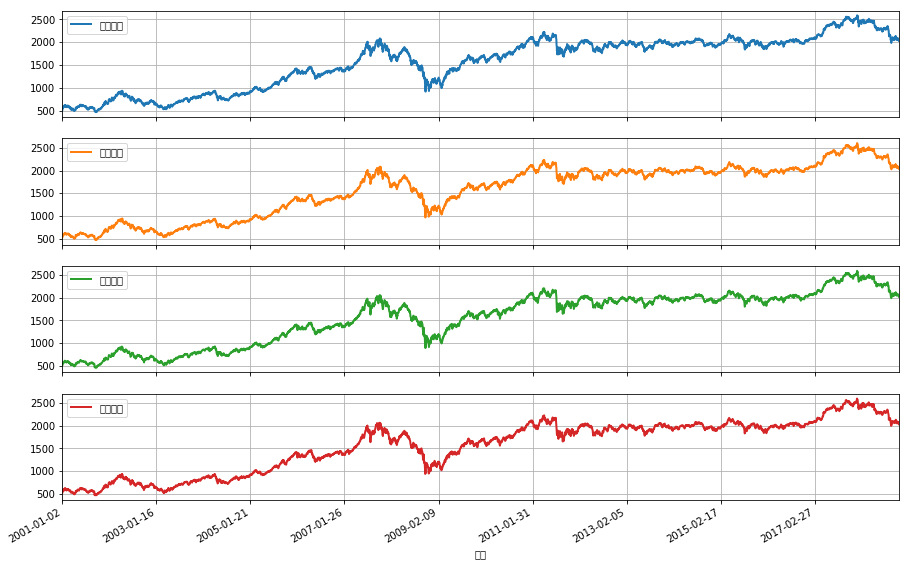

In [1452]:
# 지수시가 / 지수고가 / 지수저가 / 지수종가
plb.rcParams["figure.figsize"] = (15,10)
kospi_plot1.plot(subplots = True,x = '날짜')

- 지수시가, 지수고가, 지수저가, 지수종가의 분포가 거의 일치하는 것을 확인할 수 있다. 높은 상관관계가 예상된다.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBD3A7CF8>,
      dtype=object)

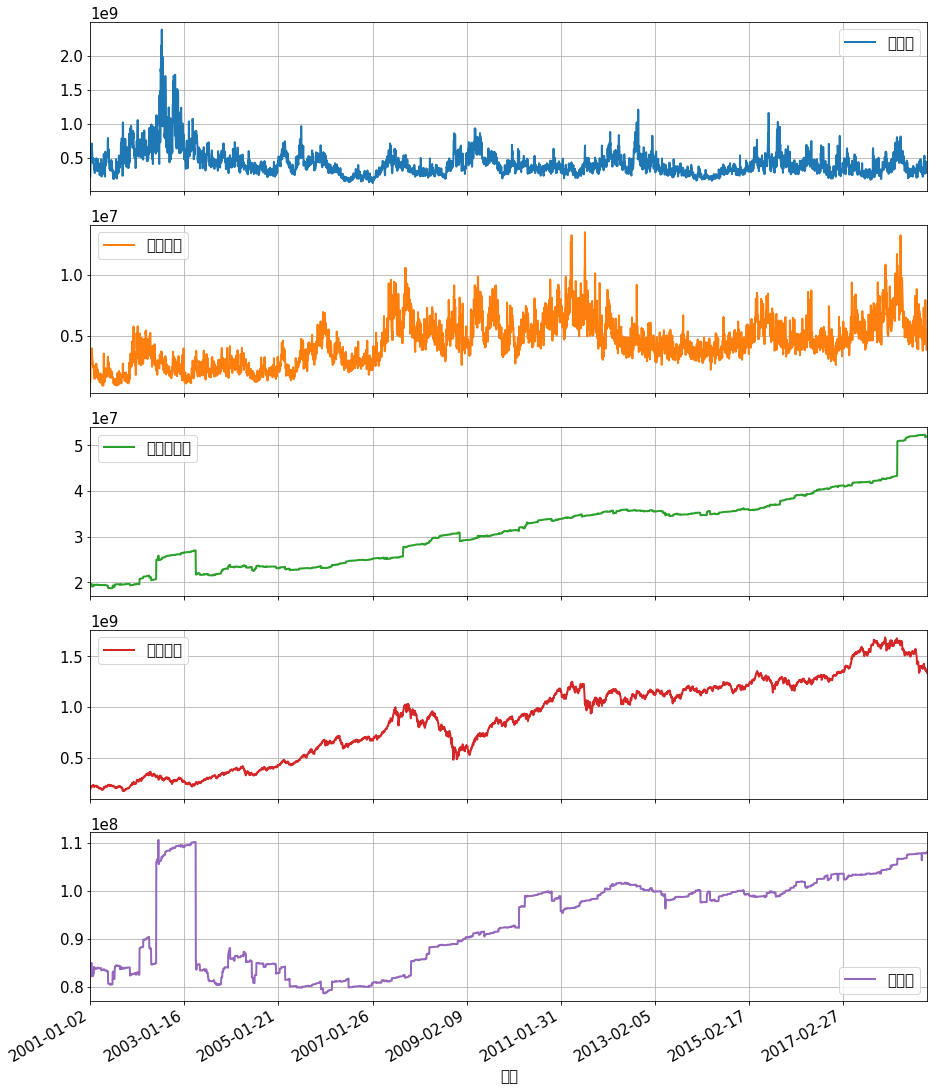

In [985]:
# 거래량 / 거래대금 / 상장주식수 / 시가총액 / 자본금

plb.rcParams["figure.figsize"] = (15,20)
kospi_plot2.plot(subplots = True,x = '날짜')

#### 상장주식수 / 자본금의 급증현상 탐색

In [876]:
kospi_noBD.iloc[350:352,:]

날짜    지수종가          거래량       거래대금       상장주식수         시가총액  \
350  2002-06-05  809.59  703392500.0  2457491.0  20705555.0  314129193.0   
351  2002-06-07  795.16  833273000.0  2347085.0  24933645.0  310469664.0   

             자본금   외국인보유주식수    외국인보유시가총액  신용거래종목수  ...  거래형성종목수  상승종목수  하락종목수  \
350   84950703.0  3399108.0  114611199.0    737.0  ...    823.0  495.0  280.0   
351  106091150.0  3401573.0  112838566.0    738.0  ...    821.0  178.0  596.0   

     보합종목수  상한종목수  하한종목수  25일이평상회종목건수  25일이평하회종목건수  52주신고가종목수  52주신저가종목수  
350   48.0   10.0    7.0         30.0         69.0        NaN        4.0  
351   49.0    9.0   20.0         20.0         79.0        1.0        8.0  

[2 rows x 24 columns]

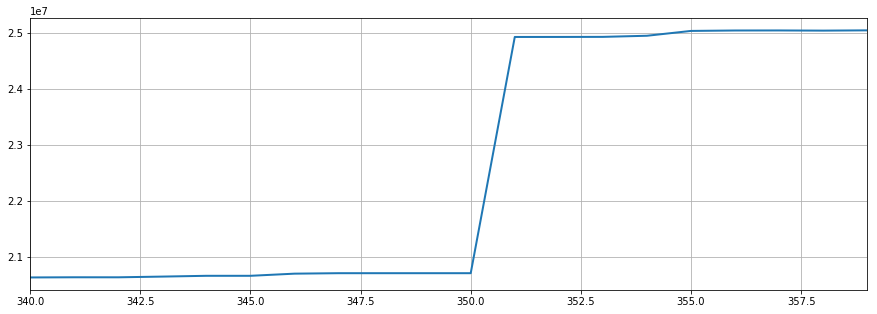

In [1453]:
plb.rcParams['figure.figsize'] = (15,5)
kospi_noBD.iloc[340:360,4].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBD427828>,
      dtype=object)

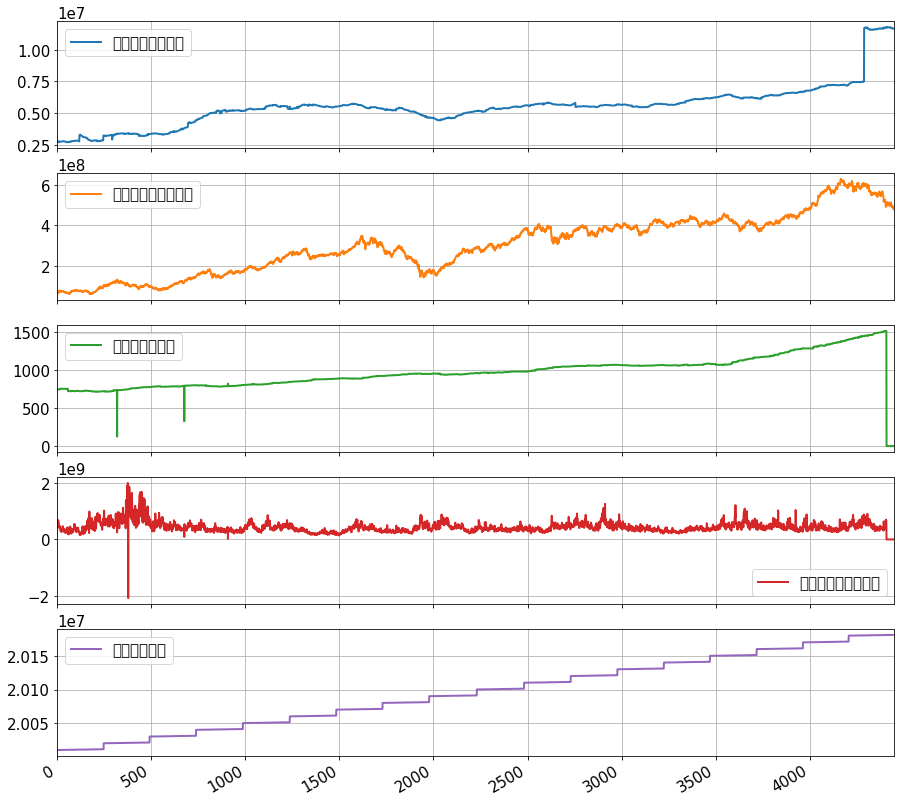

In [986]:
# 외국인보유주식수 / 외국인보유시가총액 / 신용거래종목수 / 신용가능종목거래량 / 신용자료일자

plb.rcParams["figure.figsize"] = (15,15)
kospi_plot3.plot(subplots = True)

#### 신용거래종목수 / 신용가능종목거래량 이상치 처리하기

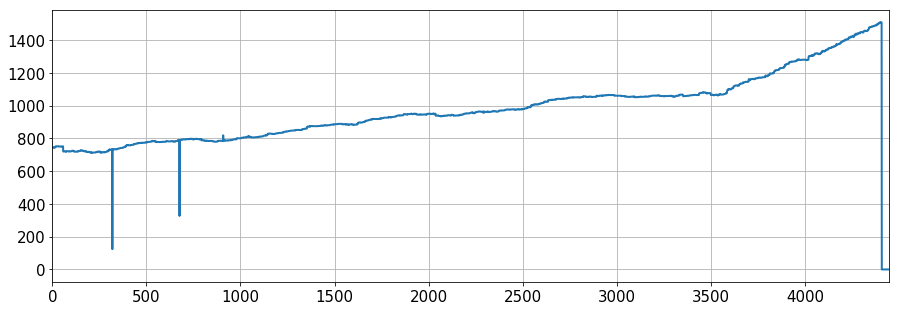

In [991]:
plb.rcParams["figure.figsize"] = (15,5)
kospi['신용거래종목수'].plot()

In [995]:
# 400 이하의 이상치
kospi[kospi['신용거래종목수']<400].iloc[:,:22] # 319 2002-04-22 # 676 2003-10-06 # 실제값 없음

kospi.iloc[319,13] = 0
kospi.iloc[676,13] = 0

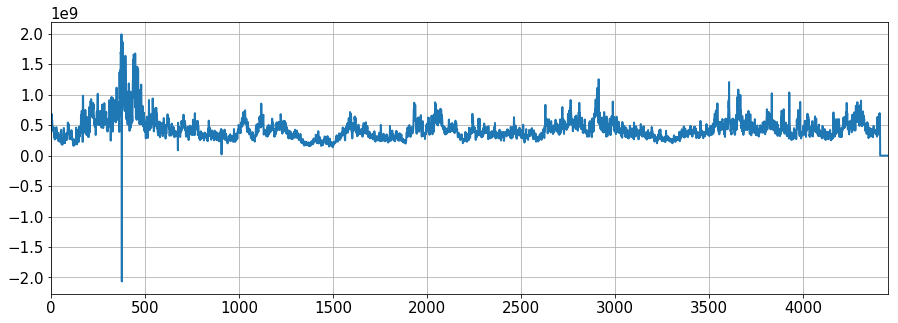

In [996]:
plb.rcParams["figure.figsize"] = (15,5)
kospi['신용가능종목거래량'].plot()

In [998]:
# 400 이하의 이상치
kospi[kospi['신용가능종목거래량']<0].iloc[:,:22] # 378 2002-07-19

kospi.iloc[378,14] = 0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E10745400>,
      dtype=object)

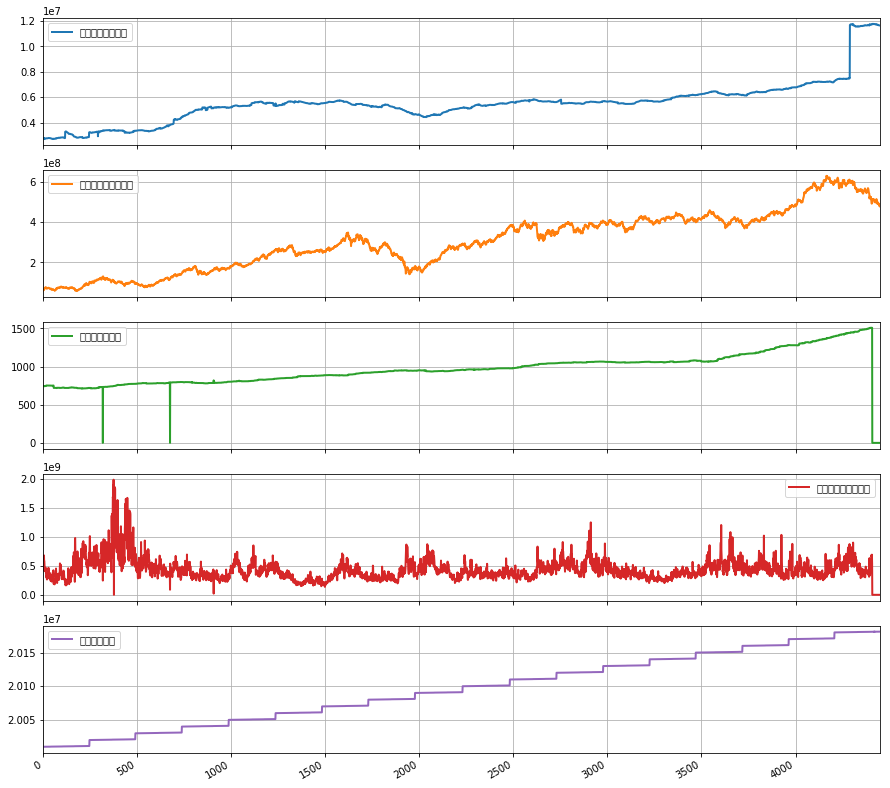

In [1465]:
# 처리 결과 확인하기
plb.rcParams["figure.figsize"] = (15,15)
kospi_plot3.plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E11370080>,
      dtype=object)

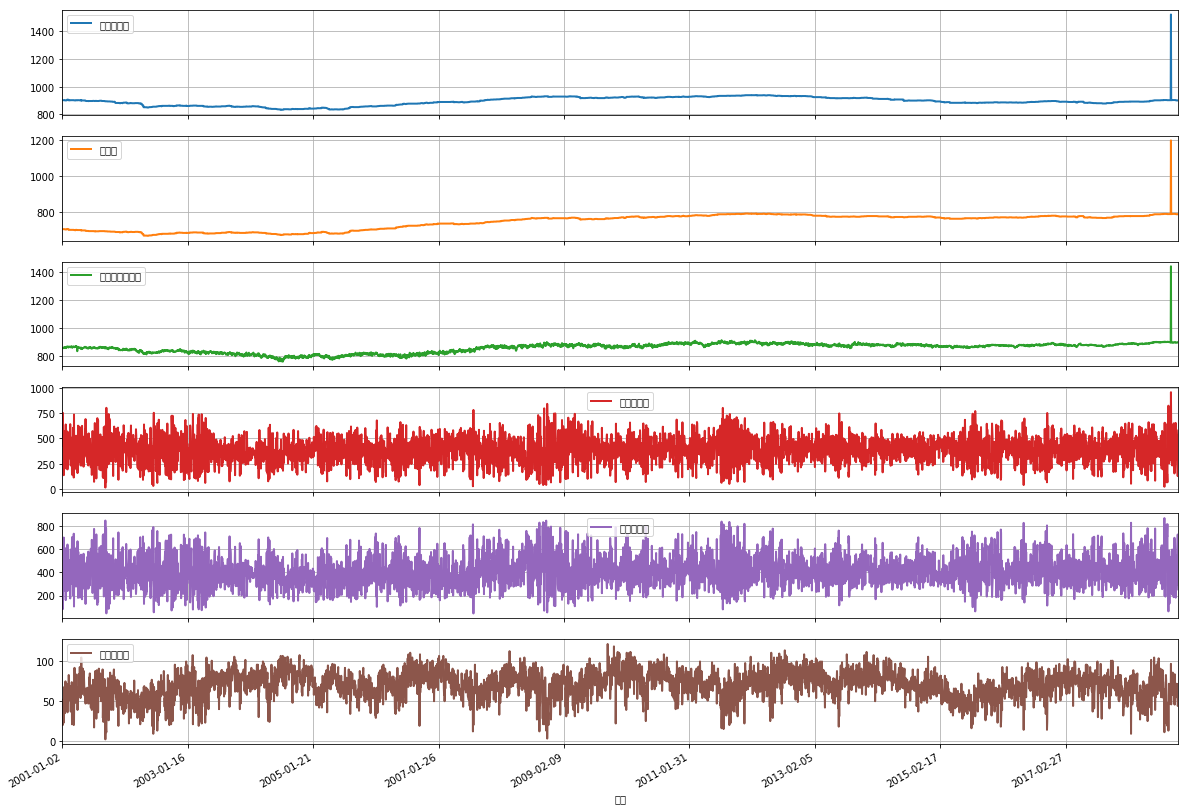

In [1466]:
# 전체종목수 / 회사수 / 거래형성종목수 / 상승종목수 / 하락종목수 / 보합종목수

plb.rcParams["figure.figsize"] = (20,15)
kospi_plot4.plot(subplots = True,x = '날짜')

- **전체종목수**, **회사수**, **거래형성종목수** 의 분포가 상당히 흡사하며, 비슷한 시기에 이상치로 의심되는 값이 발생한다.
- **상승종목수** 와 **하락종목수**의 분포 또한 매우 흡사하며 둘의 분포는 추세(trend)를 확인하기 어렵다. stationary를 의심할 수 있으며, 주기(seasonarity)가 존재하는지 확인할 필요가 있으므로 변수를 제거하지 않는다.
- **보합종목수**는 주기성(seasonarity)가 존재함을 추측할 수 있다. 

> 전체종목수 / 회사수 / 거래형성종목수 이상치 확인

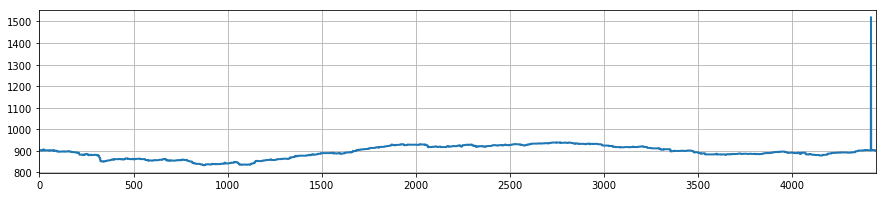

In [1459]:
# 전체종목수
plb.rcParams["figure.figsize"] = (15,3)
kospi['전체종목수'].plot()

In [1007]:
# 이상치 위치 찾아내기
kospi[kospi['전체종목수']>1200].iloc[:,15:20] # 4419
kospi.iloc[4419,0]

'2018-11-16'

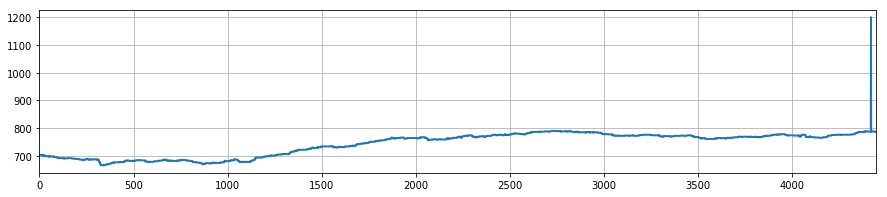

In [1460]:
# 회사수
plb.rcParams["figure.figsize"] = (15,3)
kospi['회사수'].plot()

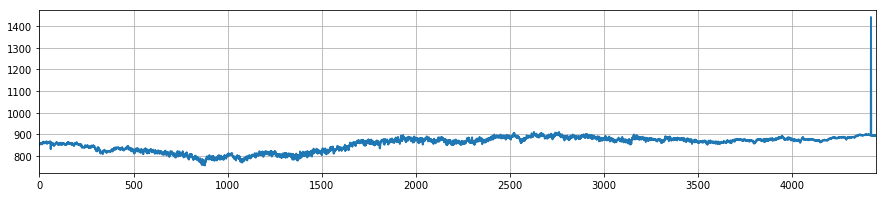

In [1461]:
# 거래형성종목수
plb.rcParams["figure.figsize"] = (15,3)
kospi['거래형성종목수'].plot()

> 2018년 11월 16일 전체종목수 / 회사수 / 거래형성종목수가 갑자기 1000 이상으로 치솟는 현상 발생. 이상치로 처리하려 하였으나 실제값이라고 판단, 이상치 처리를 하지 않기로 결정

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E149D40B8>,
      dtype=object)

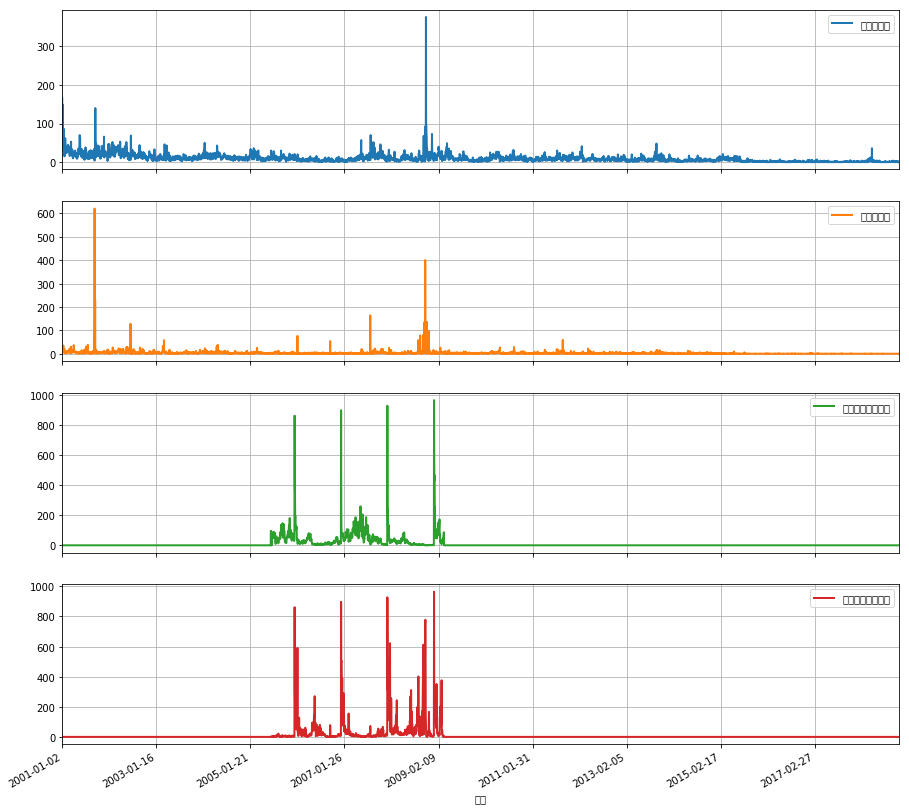

In [1467]:
# 상한종목수 / 하한종목수 / 연중최고가종목수 / 연중최저가종목수 

plb.rcParams["figure.figsize"] = (15,15)
kospi_plot5.plot(subplots = True,x = '날짜')

- **상한종목수**와 **하한종목수**의 분포가 다소 유사함을 파악할 수 있다. 비슷한 시기에 이상치로 의심되는 값이 발생한다는 점을 확인할 필요가 있다.
- **연중최고가종목수**와 **연중최저가종목수**의 분포 또한 비슷한 시기에 이상치로 의심되는 값이 발생하며 이의 주기성 또한 매우 흡사함을 확인할 수 있다. 이외의 값이 0으로 결측치라는 점을 고려하면 해당 데이터는 주기성이 존재하는 데이터라고 추측할 수 있다. 하지만 두 변수 이외의 다른 변수와의 관계성을 규명하기에는 어려울 것으로 예상되며 이에 따른 VAR 결측치 예측 또한 진행하기 어려울 것으로 판단.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E12D0DCC0>,
      dtype=object)

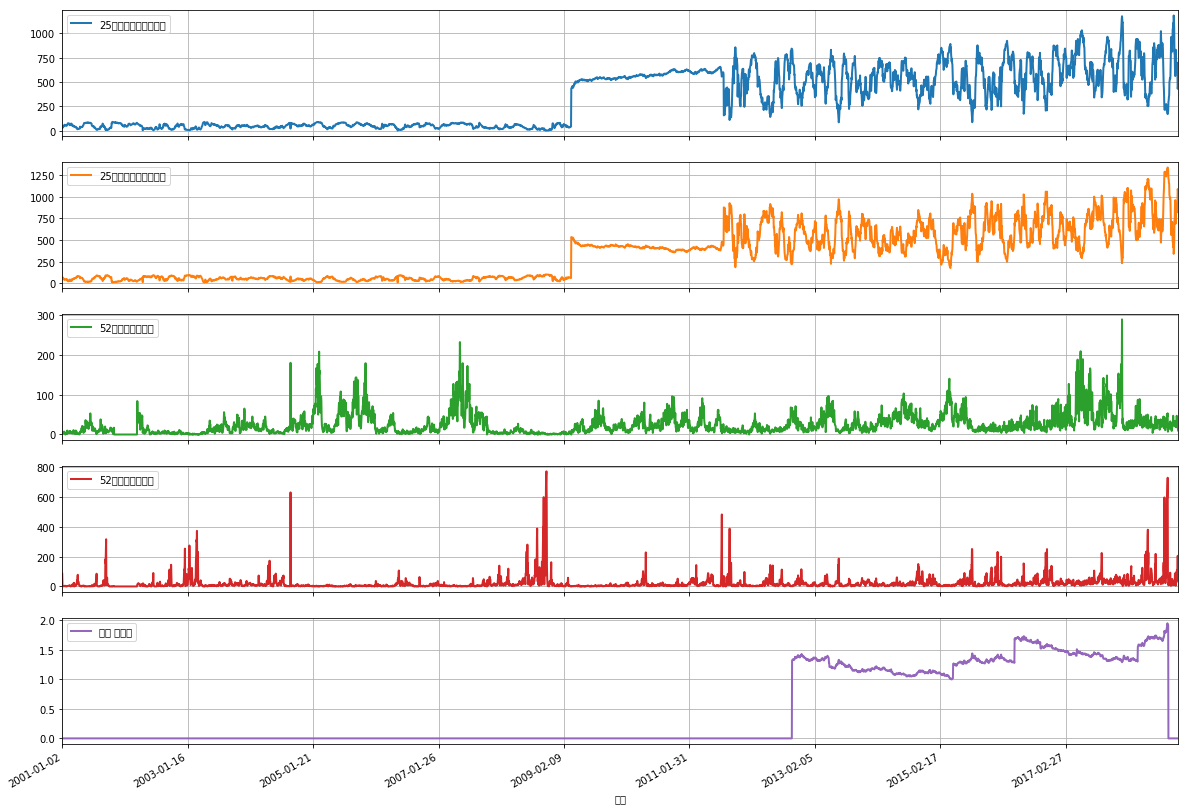

In [1469]:
# 25일이평상회종목건수 / 25일이평하회종목건수 / 52주신고가종목수 / 52주신저가종목수 / 배당 수익율

plb.rcParams["figure.figsize"] = (20,15)
kospi_plot6.plot(subplots = True,x = '날짜')

- **25일이평상회종목건수**와 **25일이평하회종목건수**의 추이가 매우 흡사한 것을 확인할 수 있다.

In [1173]:
### 배당 수익율, 연중최고가종목수, 연중최저가종목수, 지수시가, 지수고가, 지수저가, Y를 제외한 VAR 결측치 처리 결과 내보내기
kospi_nan = kospi.replace({0:np.nan})
kospi_noBD = kospi_nan.drop(['연중최고가종목수','연중최저가종목수','배당 수익율'],axis = 1)
kospi_noBD = kospi_noBD.drop(['지수시가','지수고가','지수저가','Y'], axis = 1)

#kospi_noBD = pd.concat([kospi_noBD,kospi['배당 수익율']],axis = 1)
#kospi_noBD.head()
#kospi_noBD = kospi_noBD.loc[:, (kospi_noBD != kospi_noBD.iloc[0]).any()]
kospi_noBD_VAR = fill_na_VAR(kospi_noBD)

### 연중최고가, 연중최저가만 추가해서 결측치 처리하기

In [29]:
kospi_year = kospi[['지수종가','연중최고가종목수','연중최저가종목수']]
kospi_year.corr()

지수종가  연중최고가종목수  연중최저가종목수
지수종가      1.000000 -0.039692 -0.052908
연중최고가종목수 -0.039692  1.000000  0.517393
연중최저가종목수 -0.052908  0.517393  1.000000

> 상관분석 결과 t시점의 지수종가와의 상관계수가 -0.03이하이므로 상관관계가 유의하지 않다고 볼 수 있다. 따라서 두 칼럼을 분석에 사용하지 않기로 결정했다.

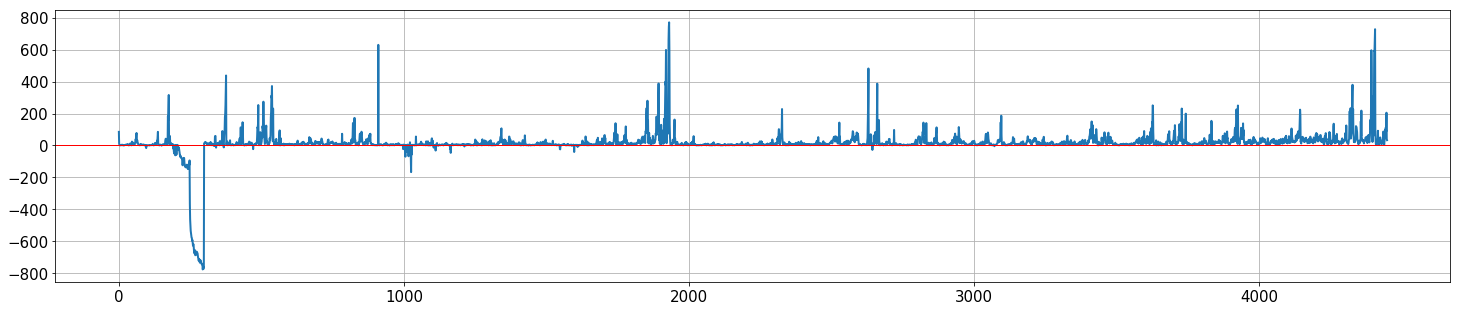

In [1175]:
# 음수로 변환된 변수 발생
plb.rcParams["figure.figsize"] = (25,5)
plt.plot(kospi_noBD_VAR['52주신저가종목수']) #상한종목수 # 하한종목수 #52주신고가종목수 #52주신저가종목수
plt.axhline(y=0, color='r', linewidth=1)
plt.show()

In [1068]:
for i in range(kospi_noBD_VAR.shape[1]):
    print(i,kospi_noBD_VAR.columns[i])

0 날짜
1 지수종가
2 거래량
3 거래대금
4 상장주식수
5 시가총액
6 자본금
7 외국인보유주식수
8 외국인보유시가총액
9 신용거래종목수
10 신용가능종목거래량
11 신용자료일자
12 전체종목수
13 회사수
14 거래형성종목수
15 상승종목수
16 하락종목수
17 보합종목수
18 상한종목수
19 하한종목수
20 25일이평상회종목건수
21 25일이평하회종목건수
22 52주신고가종목수
23 52주신저가종목수


### 문제 변수들 변환하기
상한종목수 / 하한종목수 / 52주신고가종목수 / 52주신저가종목수

- 음수 변환은 모두 0 처리

In [1159]:
def del_minus(x,col):
    data = x[x[col]<0]
    index = data.index
    c = x.columns.get_loc(col)
    for i in range(data.shape[0]):
        r = index[i]
        x.iloc[r,c] = 0
    
    return x

In [1176]:
kospi_noBD_VAR = del_minus(kospi_noBD_VAR,'상한종목수')
kospi_noBD_VAR = del_minus(kospi_noBD_VAR,'하한종목수')
kospi_noBD_VAR = del_minus(kospi_noBD_VAR,'52주신고가종목수')
kospi_noBD_VAR = del_minus(kospi_noBD_VAR,'52주신저가종목수')

In [1261]:
kospi_VAR = pd.concat([kospi_noBD_VAR,kospi['배당 수익율']],axis = 1)
kospi_VAR.to_csv('kospi_final.csv',index = False, encoding = 'euc-kr')

### per

In [1196]:
per.head()

날짜    코스피 코스피 200 코스피 100 코스피 50 코스피 대형주 코스피 중형주 코스피 소형주   제조업  \
0  2001-01-02  15.89   13.34   10.92  12.32   10.83    3.12   23.45  8.33   
1  2001-01-03  15.89   13.33   10.91  12.31   10.82    3.15   24.03  8.37   
2  2001-01-04  16.99   14.29    11.7  13.22   11.61    3.33    25.2  9.01   
3  2001-01-05  17.69    14.9   12.21   13.8   12.09    3.44   25.27   9.3   
4  2001-01-08  17.87   15.04   12.32  13.91    12.2    3.51   25.86   9.4   

   음식료품  ...   유통업 전기가스업   건설업 운수창고업    통신업  금융업 은행     증권 보험   서비스업  
0  4.54  ...  5.15  8.94  6.54  1.96  57.59    -  -  14.08  -   9.84  
1   4.6  ...  5.11  8.81  6.69  2.01  56.84    -  -  14.43  -   9.98  
2  4.69  ...  5.45  9.18  7.42  2.15  60.23    -  -  16.56  -  10.51  
3  4.72  ...  5.91  9.48  8.21  2.36  62.25    -  -  18.39  -  10.83  
4  4.72  ...  6.08  9.43  8.17  2.33  63.13    -  -  18.62  -  11.03  

[5 rows x 30 columns]

In [1204]:
per.describe()

철강금속          통신업
count  4449.000000  4449.000000
mean     10.559897    12.888384
std       4.355447     7.346037
min       3.470000     5.650000
25%       8.070000     8.760000
50%       9.960000    10.310000
75%      12.330000    13.690000
max      29.860000    66.680000

In [30]:
per.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 30 columns):
날짜         4449 non-null datetime64[ns]
코스피        4449 non-null object
코스피 200    4449 non-null object
코스피 100    4449 non-null object
코스피 50     4449 non-null object
코스피 대형주    4449 non-null object
코스피 중형주    4449 non-null object
코스피 소형주    4449 non-null object
제조업        4449 non-null object
음식료품       4449 non-null object
섬유의복       4449 non-null object
종이목재       4449 non-null object
화학         4449 non-null object
의약품        4449 non-null object
비금속광물      4449 non-null object
철강금속       4449 non-null float64
기계         4449 non-null object
전기전자       4449 non-null object
의료정밀       4449 non-null object
운수장비       4449 non-null object
유통업        4449 non-null object
전기가스업      4449 non-null object
건설업        4449 non-null object
운수창고업      4449 non-null object
통신업        4449 non-null float64
금융업        4449 non-null object
은행         4449 non-null object
증권         4449 non

In [43]:
# per의 칼럼 - 데이터 타입 변경하기 object->numeric
per_object = per.drop(['날짜','철강금속','통신업'],axis = 1) #numeric 형식의 '철강금속', '통신업' 제외

In [44]:
per_object = per_object.apply(lambda x: x.str.replace(',',''))
per_object = per_object.replace({'-':np.nan})
per_object

코스피 코스피 200 코스피 100 코스피 50 코스피 대형주 코스피 중형주 코스피 소형주    제조업   음식료품  \
0     15.89   13.34   10.92  12.32   10.83    3.12   23.45   8.33   4.54   
1     15.89   13.33   10.91  12.31   10.82    3.15   24.03   8.37    4.6   
2     16.99   14.29    11.7  13.22   11.61    3.33    25.2   9.01   4.69   
3     17.69    14.9   12.21   13.8   12.09    3.44   25.27    9.3   4.72   
4     17.87   15.04   12.32  13.91    12.2    3.51   25.86    9.4   4.72   
5     18.06   15.16   12.38  13.95   12.24    3.62   28.84   9.53   4.86   
6     17.17    14.4   11.76  13.26   11.63    3.42   27.57   9.12   4.64   
7      17.2   14.38   11.73  13.23   11.61    3.53   28.41   9.06   4.62   
8     18.02   15.13   12.35  13.93   12.26    3.59   28.62   9.52   4.71   
9     16.63   15.47   12.61   14.2   12.52    3.69   31.93   9.76   4.77   
10    16.77   15.57   12.69  14.31    12.6    3.71   31.54   9.91   4.69   
11    16.62   15.38   12.54  14.15   12.46    3.64   31.04    9.9    4.7   
12    16.84    15.6   12.73  14.38   12.65    3.62   30.85  10.18   4.73   
13    17.28   16.04    13.1  14.78   13.06    3.66   30.98  10.61   4.77   
14    17.67   16.24   13.24  14.91   13.18     3.8   30.61  10.63   4.88   
15    16.66   15.28   12.45     14   12.37    3.66   30.01   9.84   4.74   
16    16.79   15.39   12.53  14.07   12.46    3.73   30.98   9.98   4.78   
17    17.37   15.27   12.39  13.91   12.79    3.75   31.15   9.96   4.82   
18    18.14   15.98   12.99  14.61   13.41    3.82   31.11  10.42   4.91   
19    18.01   15.87   12.87  14.49   13.28    3.79      31  10.32    4.9   
20     17.9   15.75   12.77  14.37   13.18    3.81   30.95  10.28   4.98   
21    17.03   14.97   12.13  13.64    12.5    3.65   30.21   9.82   4.95   
22    17.26   15.16   12.29  13.81   12.67    3.71   30.56   9.88   4.98   
23    16.95   14.88   12.06  13.55   12.42    3.65    30.3   9.71   4.91   
24    17.41    15.3    12.4  13.95   12.78    3.71   30.66   9.97   4.98   
25    17.52   15.39   12.47  14.02   12.84    3.76   30.86  10.05      5   
26    17.64    15.5   12.56  14.13   12.92    3.78   30.85  10.03      5   
27    17.63   15.47   12.53  14.09   12.91    3.81   31.59  10.08   4.99   
28    17.78    15.6   12.63  14.19      13    3.85   31.85  10.15   5.04   
29    17.75   15.58   12.62  14.16   12.99    3.86   31.97  10.27   5.06   
...     ...     ...     ...    ...     ...     ...     ...    ...    ...   
4419  10.05    9.21       9   8.86    9.56    11.4   20.67   9.61  11.25   
4420  10.09    9.24    9.01   8.86    9.57   11.54   20.99   9.63  11.29   
4421     10    9.14    8.91   8.75    9.48    11.5    20.9   9.47  11.33   
4422   9.97     9.1    8.86   8.68    9.43   11.62   20.93   9.45  11.54   
4423   9.94    9.08    8.85   8.68    9.41   11.55   20.83   9.41  11.49   
4424   9.88    9.03     8.8   8.64    9.36   11.44   20.65   9.35  11.47   
4425     10    9.15    8.91   8.75    9.47   11.64   20.81   9.46  11.72   
4426  10.08    9.23       9   8.83    9.56   11.63   20.97   9.56  11.61   
4427  10.12    9.27    9.04   8.87     9.6   11.65   20.92   9.58  11.56   
4428  10.15     9.3    9.07   8.89    9.63   11.65   20.94   9.58  11.55   
4429  10.07     9.2    8.96   8.78    9.54   11.66   21.05   9.49  11.48   
4430  10.24    9.37    9.12   8.95     9.7   11.81   21.45   9.73  11.49   
4431  10.16    9.27    9.02   8.84    9.61   11.78   22.01   9.62  11.53   
4432   10.1    9.21    8.96   8.78    9.54   11.72   21.93   9.52  11.67   
4433   9.94    9.06    8.82   8.63     9.4   11.54   21.46   9.36  11.58   
4434   9.89    8.94    8.69   8.48    9.25   12.07   25.19   9.28  11.26   
4435   9.79    8.84     8.6   8.38    9.17   11.89   24.69   9.16  11.36   
4436   9.78    8.82    8.58   8.36    9.17   11.86   24.36   9.15  11.29   
4437   9.78    8.71    8.46   8.22    9.15   12.06   23.76   9.09  11.48   
4438   9.84    8.74    8.49   8.23    9.19   12.21   24.11   9.13  11.51   
4439   9.72    8.65    8.38    8.1    9.06   12.17      

In [45]:
for i in range(per_object.shape[1]):
    per_object.iloc[:,i] = per_object.iloc[:,i].astype(float)
per_object

코스피  코스피 200  코스피 100  코스피 50  코스피 대형주  코스피 중형주  코스피 소형주    제조업  \
0     15.89    13.34    10.92   12.32    10.83     3.12    23.45   8.33   
1     15.89    13.33    10.91   12.31    10.82     3.15    24.03   8.37   
2     16.99    14.29    11.70   13.22    11.61     3.33    25.20   9.01   
3     17.69    14.90    12.21   13.80    12.09     3.44    25.27   9.30   
4     17.87    15.04    12.32   13.91    12.20     3.51    25.86   9.40   
5     18.06    15.16    12.38   13.95    12.24     3.62    28.84   9.53   
6     17.17    14.40    11.76   13.26    11.63     3.42    27.57   9.12   
7     17.20    14.38    11.73   13.23    11.61     3.53    28.41   9.06   
8     18.02    15.13    12.35   13.93    12.26     3.59    28.62   9.52   
9     16.63    15.47    12.61   14.20    12.52     3.69    31.93   9.76   
10    16.77    15.57    12.69   14.31    12.60     3.71    31.54   9.91   
11    16.62    15.38    12.54   14.15    12.46     3.64    31.04   9.90   
12    16.84    15.60    12.73   14.38    12.65     3.62    30.85  10.18   
13    17.28    16.04    13.10   14.78    13.06     3.66    30.98  10.61   
14    17.67    16.24    13.24   14.91    13.18     3.80    30.61  10.63   
15    16.66    15.28    12.45   14.00    12.37     3.66    30.01   9.84   
16    16.79    15.39    12.53   14.07    12.46     3.73    30.98   9.98   
17    17.37    15.27    12.39   13.91    12.79     3.75    31.15   9.96   
18    18.14    15.98    12.99   14.61    13.41     3.82    31.11  10.42   
19    18.01    15.87    12.87   14.49    13.28     3.79    31.00  10.32   
20    17.90    15.75    12.77   14.37    13.18     3.81    30.95  10.28   
21    17.03    14.97    12.13   13.64    12.50     3.65    30.21   9.82   
22    17.26    15.16    12.29   13.81    12.67     3.71    30.56   9.88   
23    16.95    14.88    12.06   13.55    12.42     3.65    30.30   9.71   
24    17.41    15.30    12.40   13.95    12.78     3.71    30.66   9.97   
25    17.52    15.39    12.47   14.02    12.84     3.76    30.86  10.05   
26    17.64    15.50    12.56   14.13    12.92     3.78    30.85  10.03   
27    17.63    15.47    12.53   14.09    12.91     3.81    31.59  10.08   
28    17.78    15.60    12.63   14.19    13.00     3.85    31.85  10.15   
29    17.75    15.58    12.62   14.16    12.99     3.86    31.97  10.27   
...     ...      ...      ...     ...      ...      ...      ...    ...   
4419  10.05     9.21     9.00    8.86     9.56    11.40    20.67   9.61   
4420  10.09     9.24     9.01    8.86     9.57    11.54    20.99   9.63   
4421  10.00     9.14     8.91    8.75     9.48    11.50    20.90   9.47   
4422   9.97     9.10     8.86    8.68     9.43    11.62    20.93   9.45   
4423   9.94     9.08     8.85    8.68     9.41    11.55    20.83   9.41   
4424   9.88     9.03     8.80    8.64     9.36    11.44    20.65   9.35   
4425  10.00     9.15     8.91    8.75     9.47    11.64    20.81   9.46   
4426  10.08     9.23     9.00    8.83     9.56    11.63    20.97   9.56   
4427  10.12     9.27     9.04    8.87     9.60    11.65    20.92   9.58   
4428  10.15     9.30     9.07    8.89     9.63    11.65    20.94   9.58   
4429  10.07     9.20     8.96    8.78     9.54    11.66    21.05   9.49   
4430  10.24     9.37     9.12    8.95     9.70    11.81    21.45   9.73   
4431  10.16     9.27     9.02    8.84     9.61    11.78    22.01   9.62   
4432  10.10     9.21     8.96    8.78     9.54    11.72    21.93   9.52   
4433   9.94     9.06     8.82    8.63     9.40    11.54    21.46   9.36   
4434   9.89     8.94     8.69    8.48     9.25    12.07    25.19   9.28   
4435   9.79     8.84     8.60    8.38     9.17    11.89    24.69   9.16   
4436   9.78     8.82     8.58    8.36     9.17    11.86    24.36   9.15   
4437   9.78     8.71     8.46    8.22     9.15    12.06    23.76   9.09   
4438   9.84     8.74     8.49    8.23     9.19    12.21    24.11   9.13   
4439   9.72     8.65     8.38    8.10     9.06    12.17    24.00   8.95   
4440   9.73     8.68     8.41    

In [46]:
per = pd.concat([per[['날짜','철강금속','통신업']],per_object],axis = 1)

In [1254]:
per.columns

Index(['날짜', '철강금속', '통신업', '코스피', '코스피 200', '코스피 100', '코스피 50', '코스피 대형주',
       '코스피 중형주', '코스피 소형주', '제조업', '음식료품', '섬유의복', '종이목재', '화학', '의약품',
       '비금속광물', '기계', '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업',
       '금융업', '은행', '증권', '보험', '서비스업'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E0ACEF828>,
      dtype=object)

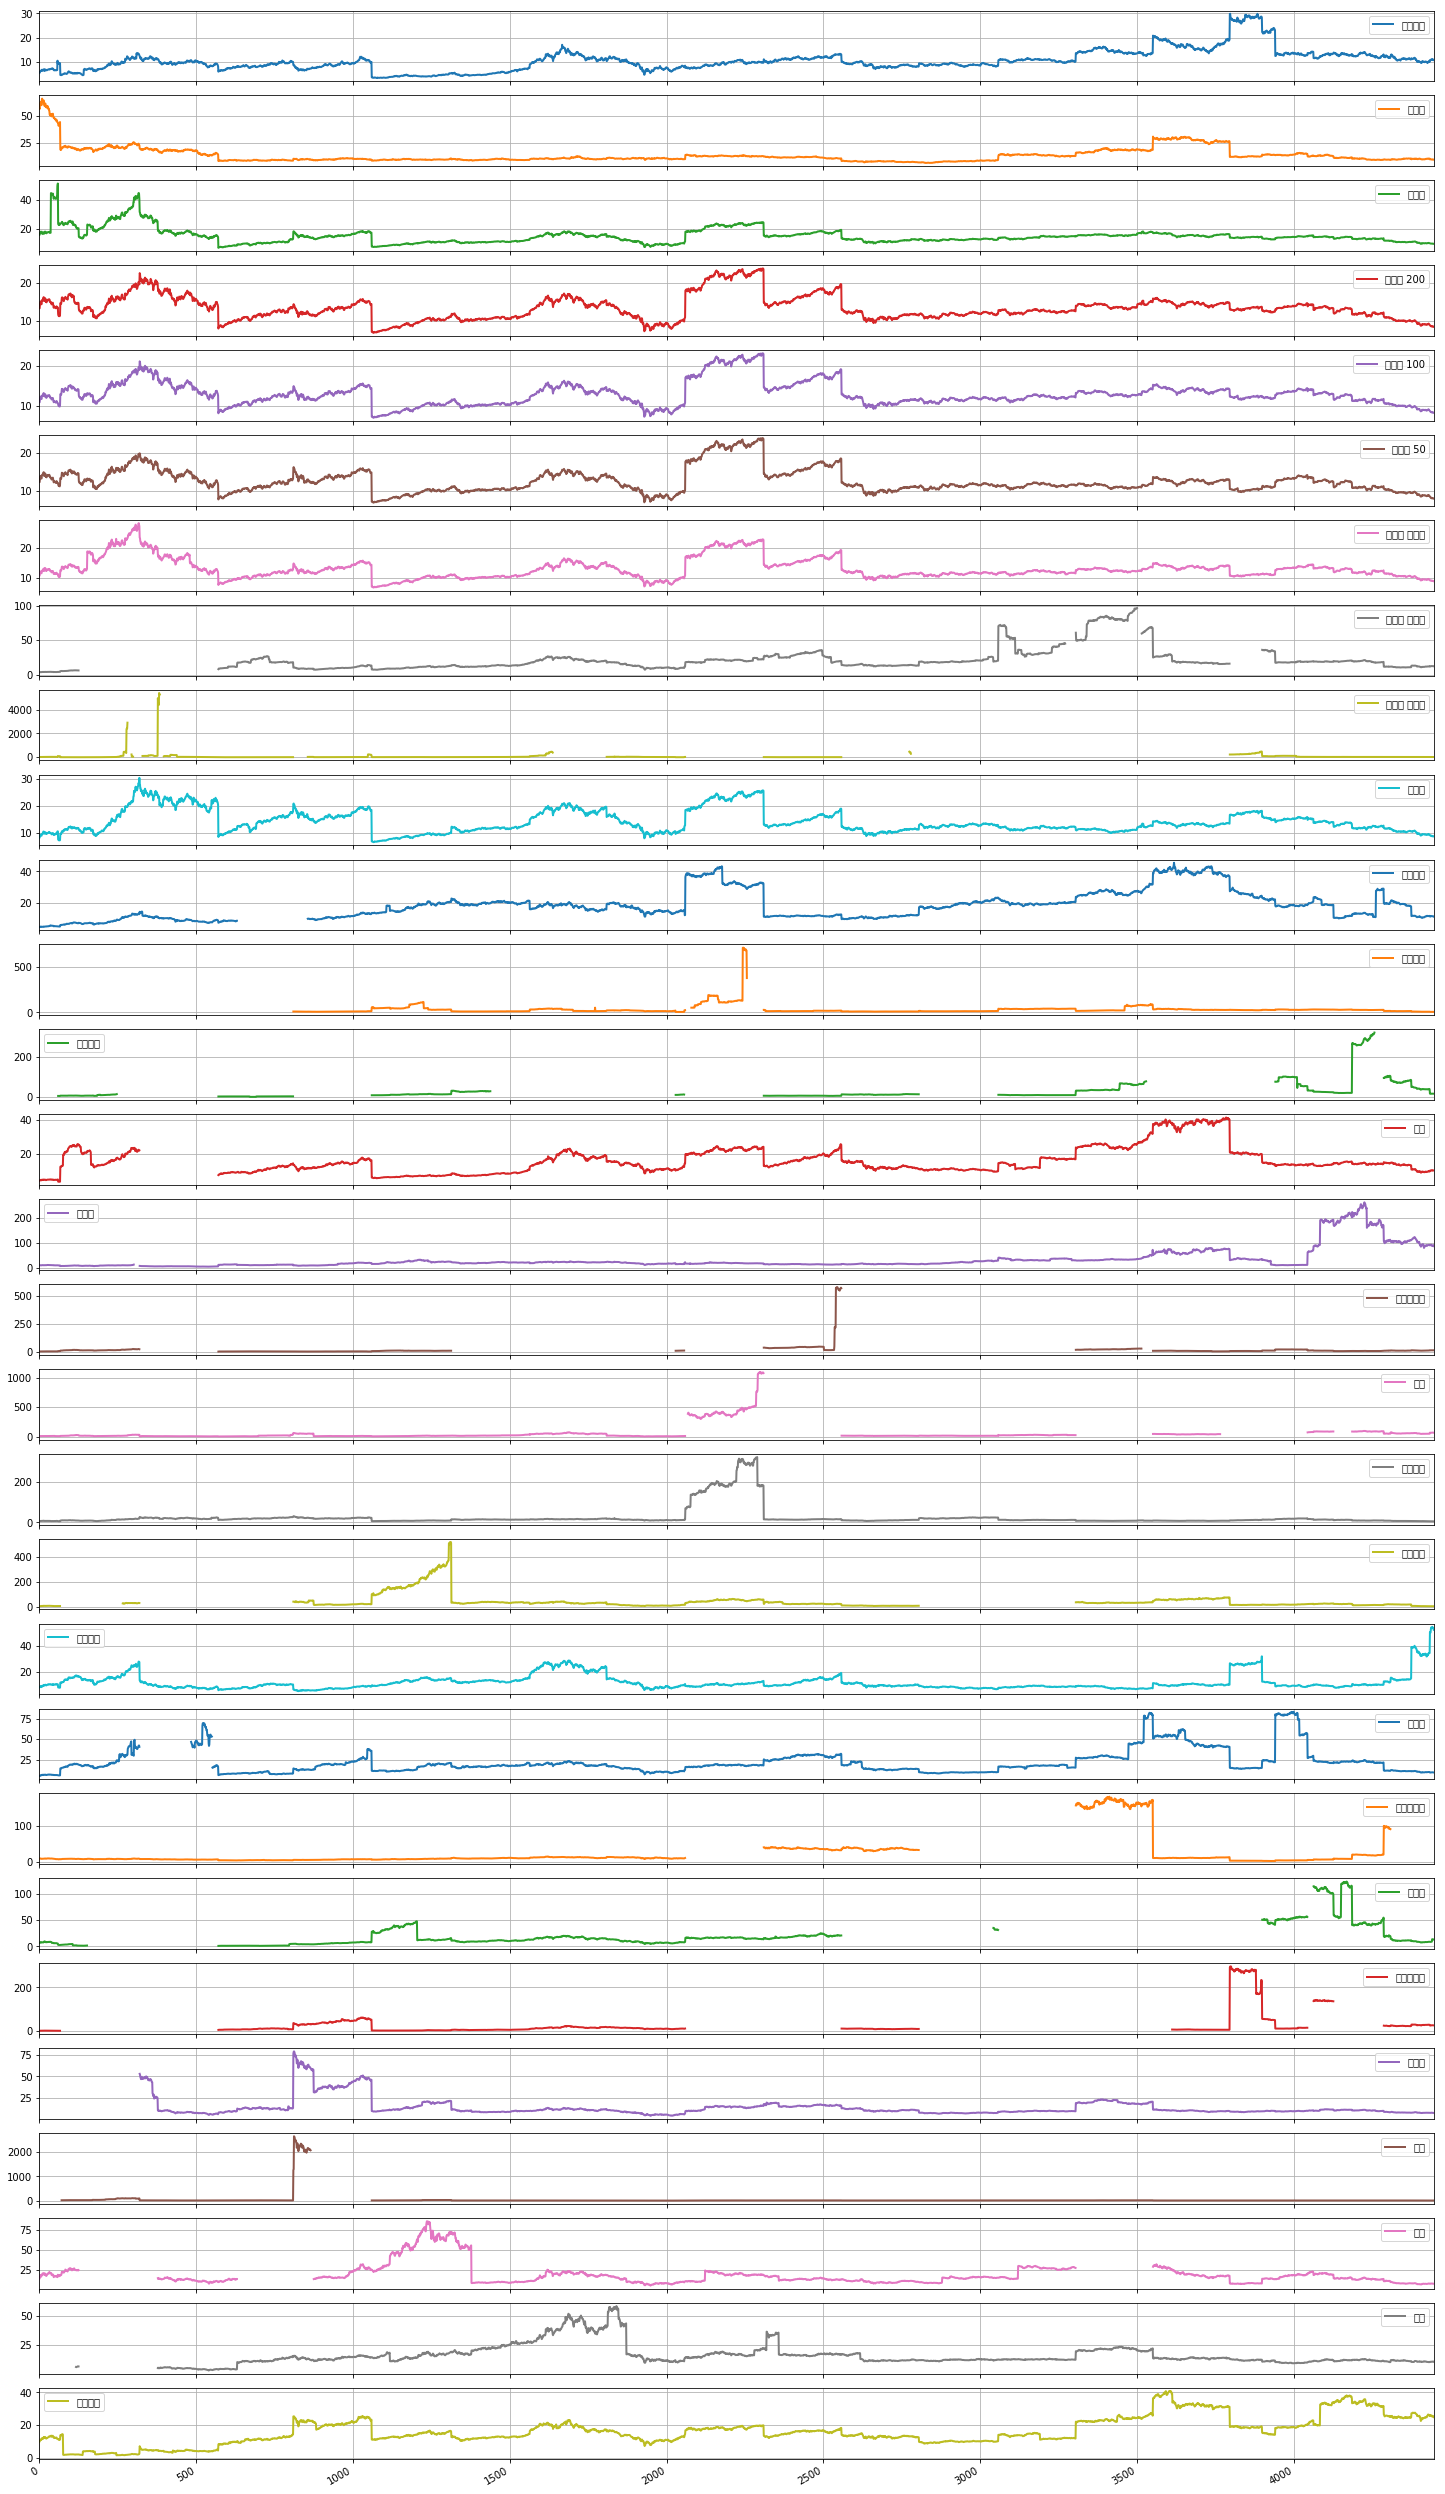

In [1470]:
plb.rcParams["figure.figsize"] = (25,50)
per.plot(subplots = True)

### 경기관련주 / 경기방어주로 분류하기 **EDA**

- 경기관련주: 철강금속,제조업,종이목재,화학,비금속광물,기계,전기전자,운수장비,건설업,서비스업
- 경기방어주: 통신업,음식료품,섬유의복,의약품,유통업,전기가스업,보험

- 확인이 필요한 변수: **의료정밀, 운수창고업, 금융업, 은행, 증권**

In [1250]:
per.to_csv('per.csv',index = False,encoding = 'euc-kr')

### 여기서부터 per 사용

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DCB139470>,
      dtype=object)

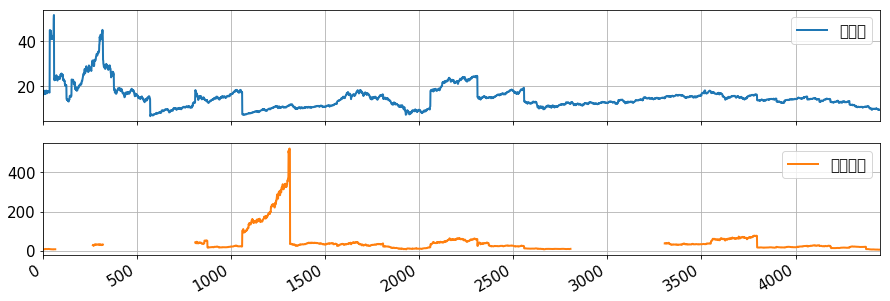

In [1258]:
plb.rcParams["figure.figsize"] = (15,5)
per[['코스피','의료정밀']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DC9CD2EB8>,
      dtype=object)

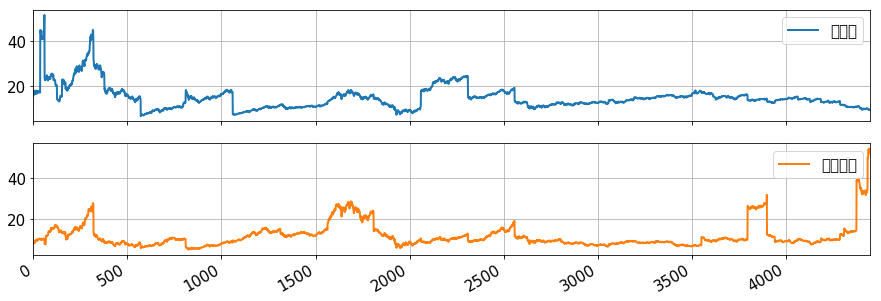

In [1259]:
plb.rcParams["figure.figsize"] = (15,5)
per[['코스피','운수장비']].plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DDB3B4CF8>,
      dtype=object)

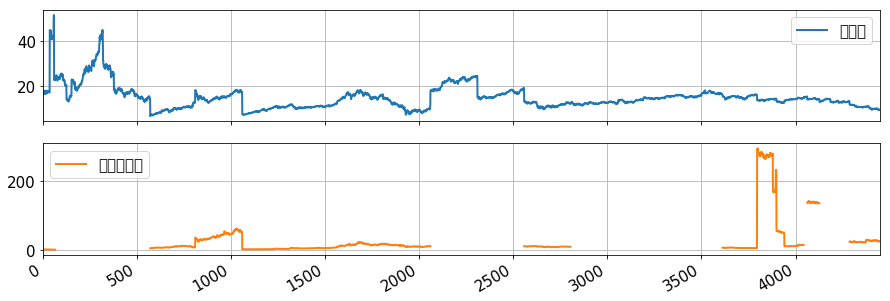

In [1290]:
plb.rcParams["figure.figsize"] = (15,5)
per[['코스피','운수창고업']].plot(subplots = True)

> 상관관계가 없다고 판단. 사용하지 않음

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DDB76BA90>,
      dtype=object)

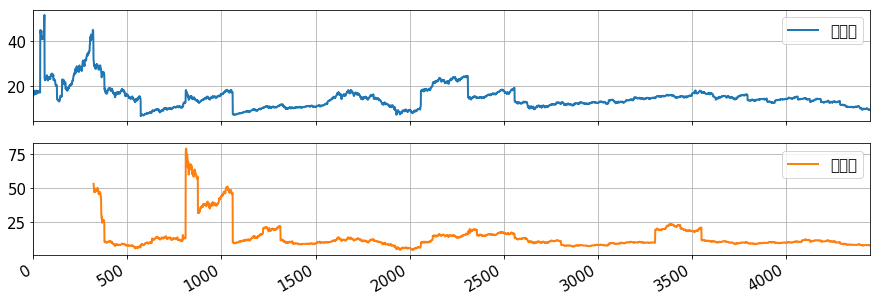

In [1291]:
plb.rcParams["figure.figsize"] = (15,5)
per[['코스피','금융업']].plot(subplots = True)

> 상관관계 분석이 필요하다고 판단.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DDA5DB8D0>,
      dtype=object)

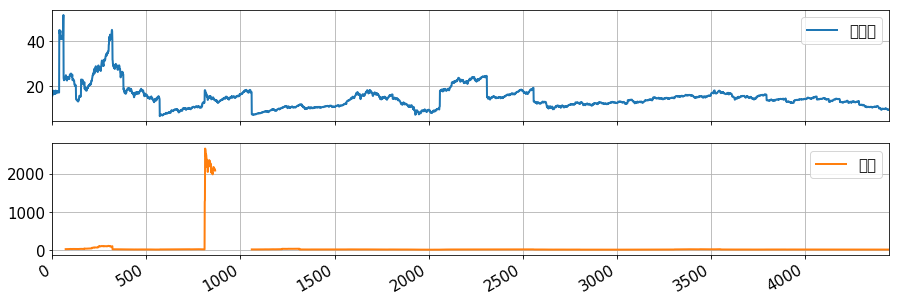

In [1288]:
plb.rcParams["figure.figsize"] = (15,5)
per[['코스피','은행']].plot(subplots = True)

> 상관관계가 없다고 판단. 사용하지 않음

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DDB387BA8>,
      dtype=object)

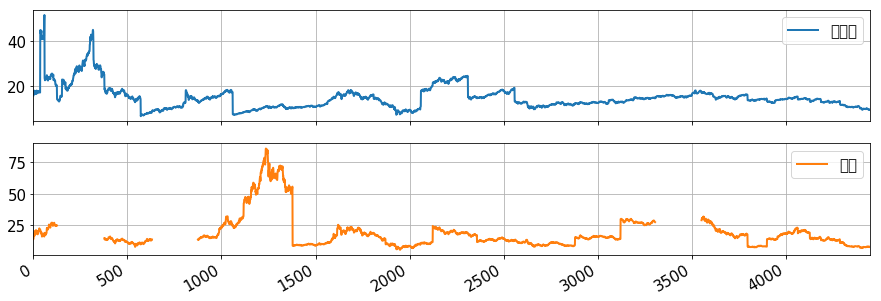

In [1289]:
plb.rcParams["figure.figsize"] = (15,5)
per[['코스피','증권']].plot(subplots = True)

> 상관관계 분석이 필요하다고 판단.

### (**결론**)상관분석으로 판단할 변수 / 사용하지 않을 변수 분류하기 **EDA**
- 사용할 변수: 철강금속,제조업,종이목재,화학,비금속광물,기계,전기전자,운수장비,건설업,서비스업
- 상관분석으로 판단할 변수: 의료정밀, 금융업, 증권
- 사용하지 않을 변수: 통신업,음식료품,섬유의복,의약품,유통업,전기가스업,보험, 운수창고업, 은행

### 상관분석: 의료정밀, 금융업, 증권

In [48]:
per_corr = pd.concat([kospi['지수종가'],per[['의료정밀','금융업','증권']]],axis = 1)
per_corr.corr()

지수종가      의료정밀       금융업        증권
지수종가  1.000000 -0.211375 -0.339181 -0.154796
의료정밀 -0.211375  1.000000  0.071924  0.798975
금융업  -0.339181  0.071924  1.000000  0.248596
증권   -0.154796  0.798975  0.248596  1.000000

> 의료정밀, 금융업, 증권 변수는 **지수종가**와의 상관관계가 유의하지 않으므로 분석에 사용하지 않는다.

In [1298]:
per_eda.head()

날짜  철강금속    코스피  코스피 200  코스피 100  코스피 50  코스피 대형주  코스피 중형주  \
0  2001-01-02  5.61  15.89    13.34    10.92   12.32    10.83     3.12   
1  2001-01-03  5.62  15.89    13.33    10.91   12.31    10.82     3.15   
2  2001-01-04  6.03  16.99    14.29    11.70   13.22    11.61     3.33   
3  2001-01-05  6.22  17.69    14.90    12.21   13.80    12.09     3.44   
4  2001-01-08  6.23  17.87    15.04    12.32   13.91    12.20     3.51   

   코스피 소형주   제조업  ...    화학  비금속광물     기계  전기전자  의료정밀  운수장비   건설업  금융업     증권  \
0    23.45  8.33  ...  4.16   3.68  13.54  6.36  5.56  8.16  6.54  NaN  14.08   
1    24.03  8.37  ...  4.21   3.67  13.35  6.40  5.61  8.20  6.69  NaN  14.43   
2    25.20  9.01  ...  4.42   3.79  14.14  7.07  6.20  8.64  7.42  NaN  16.56   
3    25.27  9.30  ...  4.55   3.80  14.51  7.37  6.34  8.98  8.21  NaN  18.39   
4    25.86  9.40  ...  4.62   3.92  14.82  7.41  6.72  9.22  8.17  NaN  18.62   

    서비스업  
0   9.84  
1   9.98  
2  10.51  
3  10.83  
4  11.03  

[5 rows x 21 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E014FADA0>,
      dtype=object)

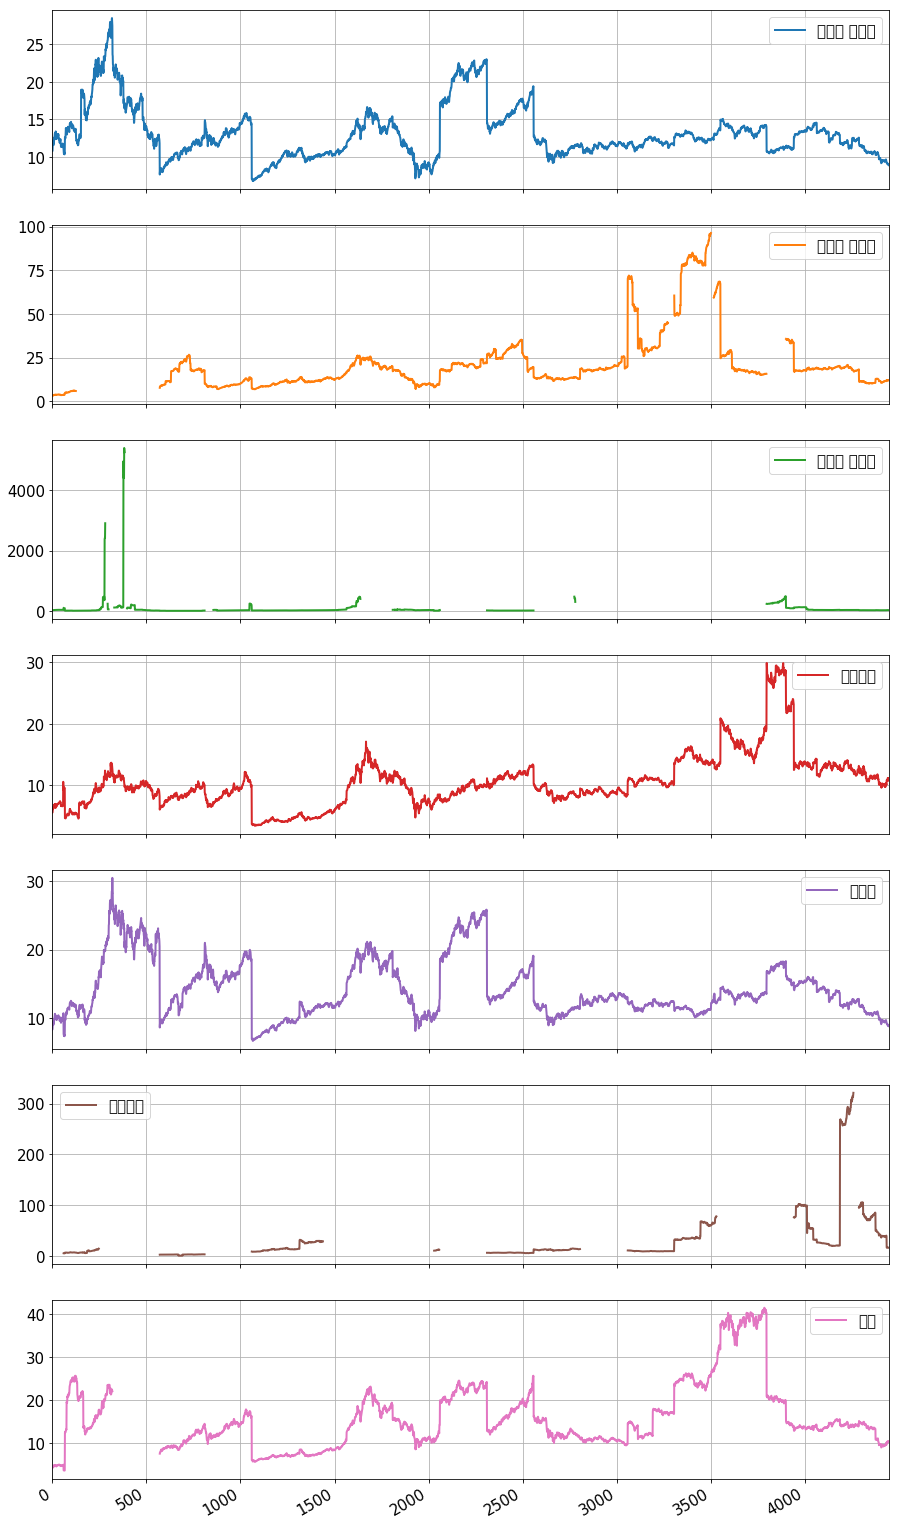

In [1397]:
#per_eda = per.drop(['통신업','음식료품','섬유의복','의약품','유통업','전기가스업','보험','운수창고업','은행'],axis = 1)
plb.rcParams['figure.figsize'] = (15,30)
per_eda.iloc[:,2:9].plot(subplots = True)

In [1302]:
per_eda.iloc[:,2:9].corr()

코스피   코스피 200   코스피 100    코스피 50   코스피 대형주   코스피 중형주   코스피 소형주
코스피      1.000000  0.760904  0.726392  0.730733  0.838253  0.159851  0.134647
코스피 200  0.760904  1.000000  0.989738  0.959586  0.916239  0.225337  0.172957
코스피 100  0.726392  0.989738  1.000000  0.974947  0.927493  0.203781  0.152264
코스피 50   0.730733  0.959586  0.974947  1.000000  0.920060  0.056030  0.112551
코스피 대형주  0.838253  0.916239  0.927493  0.920060  1.000000  0.168533  0.151784
코스피 중형주  0.159851  0.225337  0.203781  0.056030  0.168533  1.000000  0.190949
코스피 소형주  0.134647  0.172957  0.152264  0.112551  0.151784  0.190949  1.000000

- 코스피200과 코스피100의 높은 상관관계
- 코스피200과 코스피50의 높은 상관관계
- 코스피200과 코스피 대형주의 높은 상관관계

> 코스피200 / 코스피100 / 코스피50 / 코스피 대형주는 서로 높은 상관관계를 보이므로 **코스피 대형주**변수로 나머지를 충분히 설명할 수 있다고 판단하였음. 따라서 사용하지 않는다.

#### 최종 per 변수
코스피,코스피 대형주,코스피 중형주,코스피 소형주,철강금속,제조업,종이목재,화학,비금속광물,기계,전기전자,운수장비,건설업,서비스업, 의료정밀, 금융업, 증권

In [1325]:
per_eda = per_eda[['날짜','코스피','코스피 대형주','코스피 중형주','코스피 소형주','철강금속','제조업','종이목재','화학','비금속광물','기계','전기전자','운수장비','건설업','서비스업', '의료정밀'
                   , '금융업', '증권']]
per_eda.head()

날짜    코스피  코스피 대형주  코스피 중형주  코스피 소형주  철강금속   제조업  종이목재    화학  \
0  2001-01-02  15.89    10.83     3.12    23.45  5.61  8.33   NaN  4.16   
1  2001-01-03  15.89    10.82     3.15    24.03  5.62  8.37   NaN  4.21   
2  2001-01-04  16.99    11.61     3.33    25.20  6.03  9.01   NaN  4.42   
3  2001-01-05  17.69    12.09     3.44    25.27  6.22  9.30   NaN  4.55   
4  2001-01-08  17.87    12.20     3.51    25.86  6.23  9.40   NaN  4.62   

   비금속광물     기계  전기전자  운수장비   건설업   서비스업  의료정밀  금융업     증권  
0   3.68  13.54  6.36  8.16  6.54   9.84  5.56  NaN  14.08  
1   3.67  13.35  6.40  8.20  6.69   9.98  5.61  NaN  14.43  
2   3.79  14.14  7.07  8.64  7.42  10.51  6.20  NaN  16.56  
3   3.80  14.51  7.37  8.98  8.21  10.83  6.34  NaN  18.39  
4   3.92  14.82  7.41  9.22  8.17  11.03  6.72  NaN  18.62

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DE209D7B8>,
      dtype=object)

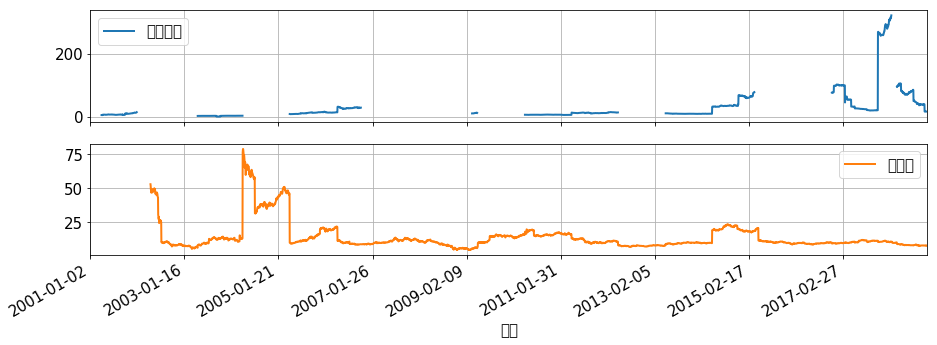

In [1326]:
per_eda[['날짜','종이목재','금융업']].plot(x = '날짜',subplots = True)

> 코스피 지수와 상관관계가 있다고 보기 어렵고 결측값이 너무 많아서 예측값으로 채우는 것도 의미가 없다고 판단. 우선 reverse VAR로 결측값을 채워본다 

In [1330]:
per_eda_rev = per_eda.sort_values('날짜',ascending = False).reset_index().drop('index',axis = 1)
per_eda_rev.head()

날짜   코스피  코스피 대형주  코스피 중형주  코스피 소형주   철강금속   제조업   종이목재     화학  \
0  2018-12-28  9.58     8.92    12.06    23.67  10.73  8.87  16.16  10.19   
1  2018-12-27  9.53     8.88    11.99    23.38  10.75  8.82  15.90  10.17   
2  2018-12-26  9.53     8.90    11.84    23.15  10.84  8.79  15.87  10.18   
3  2018-12-24  9.65     9.01    12.07    23.56  10.98  8.87  16.18  10.28   
4  2018-12-21  9.68     9.02    12.15    23.77  10.84  8.88  16.22  10.34   

   비금속광물     기계  전기전자   운수장비    건설업   서비스업  의료정밀   금융업    증권  
0  14.40  71.94  5.50  52.63  13.14  25.15  5.28  7.60  7.74  
1  14.32  70.71  5.47  52.35  13.10  25.16  5.17  7.56  7.69  
2  14.29  69.18  5.45  52.15  12.80  24.78  5.02  7.70  7.80  
3  14.56  71.64  5.51  53.59  13.13  25.35  5.18  7.83  7.97  
4  14.52  71.11  5.49  53.68  13.34  25.44  5.14  7.86  8.01

In [1331]:
per_rev_VAR = fill_na_VAR(per_eda_rev)

In [1332]:
per_rev_VAR.isnull().sum()

날짜         0
코스피        0
코스피 대형주    0
코스피 중형주    0
코스피 소형주    0
철강금속       0
제조업        0
종이목재       0
화학         0
비금속광물      0
기계         0
전기전자       0
운수장비       0
건설업        0
서비스업       0
의료정밀       0
금융업        0
증권         0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DE250EC18>,
      dtype=object)

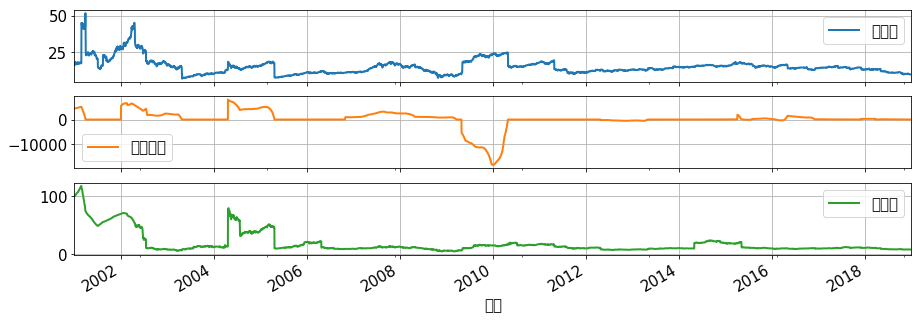

In [1334]:
per_rev_VAR[['날짜','코스피','종이목재','금융업']].plot(x = '날짜',subplots = True)

In [1354]:
per_rev_VAR[per_rev_VAR.iloc[:,10]<0] #코스피 중형주 #코스피 소형주 #종이목재 #비금속광물 #기계 #건설업 #의료정밀 

날짜    코스피  코스피 대형주  코스피 중형주  코스피 소형주   철강금속    제조업    종이목재  \
675  2016-03-29  16.19    14.15    15.30   -92.86  17.58  13.59 -279.40   
676  2016-03-28  16.09    14.07    15.18  -109.29  17.34  13.52 -300.56   
677  2016-03-25  16.10    14.07    15.18  -125.77  17.23  13.52 -315.32   
678  2016-03-24  16.12    14.09    15.15  -141.31  17.24  13.50 -327.75   
679  2016-03-23  16.19    14.15    15.26  -155.44  17.59  13.55 -339.26   
680  2016-03-22  16.21    14.17    15.23  -167.57  17.39  13.56 -350.57   
681  2016-03-21  16.15    14.11    15.21  -178.62  17.45  13.48 -361.82   
682  2016-03-18  16.19    14.12    15.33  -190.43  17.57  13.50 -367.72   
1084 2014-07-29  16.09    13.39    77.69 -1475.03  15.83  11.78   33.60   
1085 2014-07-28  15.98    13.26    78.25 -1471.18  15.83  11.65   34.21   
1086 2014-07-25  15.86    13.14    78.61 -1465.36  15.52  11.67   34.27   
1087 2014-07-24  15.81    13.10    78.27 -1455.44  15.24  11.65   34.37   
1088 2014-07-23  15.82    13.08    78.88 -1444.56  15.14  11.61   34.41   
1089 2014-07-22  15.83    13.11    78.30 -1434.07  15.00  11.64   34.67   
1090 2014-07-21  15.75    13.04    77.70 -1422.32  14.77  11.59   34.93   
1091 2014-07-18  15.75    13.06    77.58 -1410.74  14.71  11.63   34.95   
1092 2014-07-17  15.76    13.06    77.82 -1398.90  14.86  11.61   34.90   
1093 2014-07-16  15.71    13.01    77.63 -1388.38  14.71  11.54   35.04   
1094 2014-07-15  15.70    12.99    78.10 -1377.00  14.49  11.49   35.07   
1095 2014-07-14  15.51    12.79    78.46 -1365.55  14.43  11.29   35.52   
1096 2014-07-11  15.47    12.77    77.87 -1350.86  14.57  11.28   34.91   
1097 2014-07-10  15.58    12.88    77.79 -1336.77  14.63  11.39   35.00   
1098 2014-07-09  15.56    12.86    77.91 -1323.02  14.51  11.37   34.54   
1099 2014-07-08  15.61    12.92    77.76 -1309.73  14.67  11.41   34.32   
1100 2014-07-07  15.77    12.92    77.59 -1297.33  14.69  11.40   33.89   
1101 2014-07-04  15.81    12.94    78.35 -1284.46  14.67  11.46   33.71   
1102 2014-07-03  15.82    12.96    78.08 -1271.28  14.60  11.48   33.60   
1103 2014-07-02  15.85    13.02    77.61 -1258.68  14.54  11.51   33.00   
1104 2014-07-01  15.71    12.91    74.22 -1247.35  14.50  11.37   32.72   
1105 2014-06-30  15.74    12.95    73.96 -1237.07  14.58  11.43   32.04   
...         ...    ...      ...      ...      ...    ...    ...     ...   
1114 2014-06-17  15.57    12.96    50.00 -1168.23  13.96  11.50   31.48   
1115 2014-06-16  15.51    12.90    50.00 -1163.04  14.04  11.45   31.79   
1116 2014-06-13  15.48    12.88    49.99 -1158.02  14.00  11.42   31.92   
1117 2014-06-12  15.64    13.04    50.11 -1153.20  14.14  11.56   31.86   
1118 2014-06-11  15.67    13.07    49.99 -1148.27  14.22  11.58   31.59   
1119 2014-06-10  15.65    13.07    49.66 -1144.12  14.16  11.59   31.46   
1120 2014-06-09  15.48    12.92    49.17 -1138.56  14.03  11.45   31.36   
1121 2014-06-05  15.52    12.97    49.07 -1131.93  13.79  11.54   31.62   
1122 2014-06-03  15.62    13.05    49.42 -1122.82  13.93  11.61   31.48   
1123 2014-06-02  15.57    12.99    49.61 -1114.26  14.07  11.56   31.67   
1124 2014-05-30  15.51    12.92    49.71 -1104.88  14.01  11.50   32.25   
1125 2014-05-29  15.65    13.04    50.04 -1096.00  14.14  11.60   32.20   
1126 2014-05-28  15.69    13.07    50.73 -1088.59  14.25  11.58   32.29   
1127 2014-05-27  15.54    12.94    50.22 -1082.02  14.22  11.46   31.64   
1128 2014-05-26  15.64    13.04    50.32 -1076.24  14.43  11.55   31.95   
1129 2014-05-23  15.69    13.09    50.33 -1071.09  14.46  11.57   31.85   
1130 2014-05-22  15.71    13.12    50.12 -1066.23  14.52  11.56   31.81   
1131 2014-05-21  15.66    13.07    49.83 -1063.85  14.35  11.52   31.71   
1132 2014-05-20  15.68    13.11    49.61 -1060.95  14.19  11.51   31.38   
1133 2014-05-19  15.70    13.13    49.83 -1060.09  14.31  11.53   31.71   
1134 2014-05-16  15.69    13.11    49.99 -1060.31  14.32  11.52   32.22   
1135 2014-05-15  15.64    13.06    49.

> 음수값 발생: #코스피 중형주 #코스피 소형주 #종이목재 #비금속광물 #기계 #건설업 #의료정밀 

In [1355]:
# 음수값 처리하기
per_rev_VAR = del_minus(per_rev_VAR,'코스피 중형주')
per_rev_VAR = del_minus(per_rev_VAR,'코스피 소형주')
per_rev_VAR = del_minus(per_rev_VAR,'종이목재')
per_rev_VAR = del_minus(per_rev_VAR,'비금속광물')
per_rev_VAR = del_minus(per_rev_VAR,'기계')
per_rev_VAR = del_minus(per_rev_VAR,'건설업')
per_rev_VAR = del_minus(per_rev_VAR,'의료정밀')

In [1363]:
# 다시 돌리기
per_VAR = per_rev_VAR.sort_values('날짜').reset_index().drop('index',axis = 1)
per_VAR.head()

날짜    코스피  코스피 대형주  코스피 중형주  코스피 소형주  철강금속   제조업     종이목재    화학  \
0 2001-01-02  15.89    10.83     3.12    23.45  5.61  8.33  4397.24  4.16   
1 2001-01-03  15.89    10.82     3.15    24.03  5.62  8.37  4408.54  4.21   
2 2001-01-04  16.99    11.61     3.33    25.20  6.03  9.01  4421.69  4.42   
3 2001-01-05  17.69    12.09     3.44    25.27  6.22  9.30  4436.84  4.55   
4 2001-01-08  17.87    12.20     3.51    25.86  6.23  9.40  4451.49  4.62   

   비금속광물     기계  전기전자  운수장비   건설업   서비스업  의료정밀     금융업     증권  
0   3.68  13.54  6.36  8.16  6.54   9.84  5.56   99.07  14.08  
1   3.67  13.35  6.40  8.20  6.69   9.98  5.61   99.44  14.43  
2   3.79  14.14  7.07  8.64  7.42  10.51  6.20   99.79  16.56  
3   3.80  14.51  7.37  8.98  8.21  10.83  6.34  100.12  18.39  
4   3.92  14.82  7.41  9.22  8.17  11.03  6.72  100.46  18.62

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E05EC9668>,
      dtype=object)

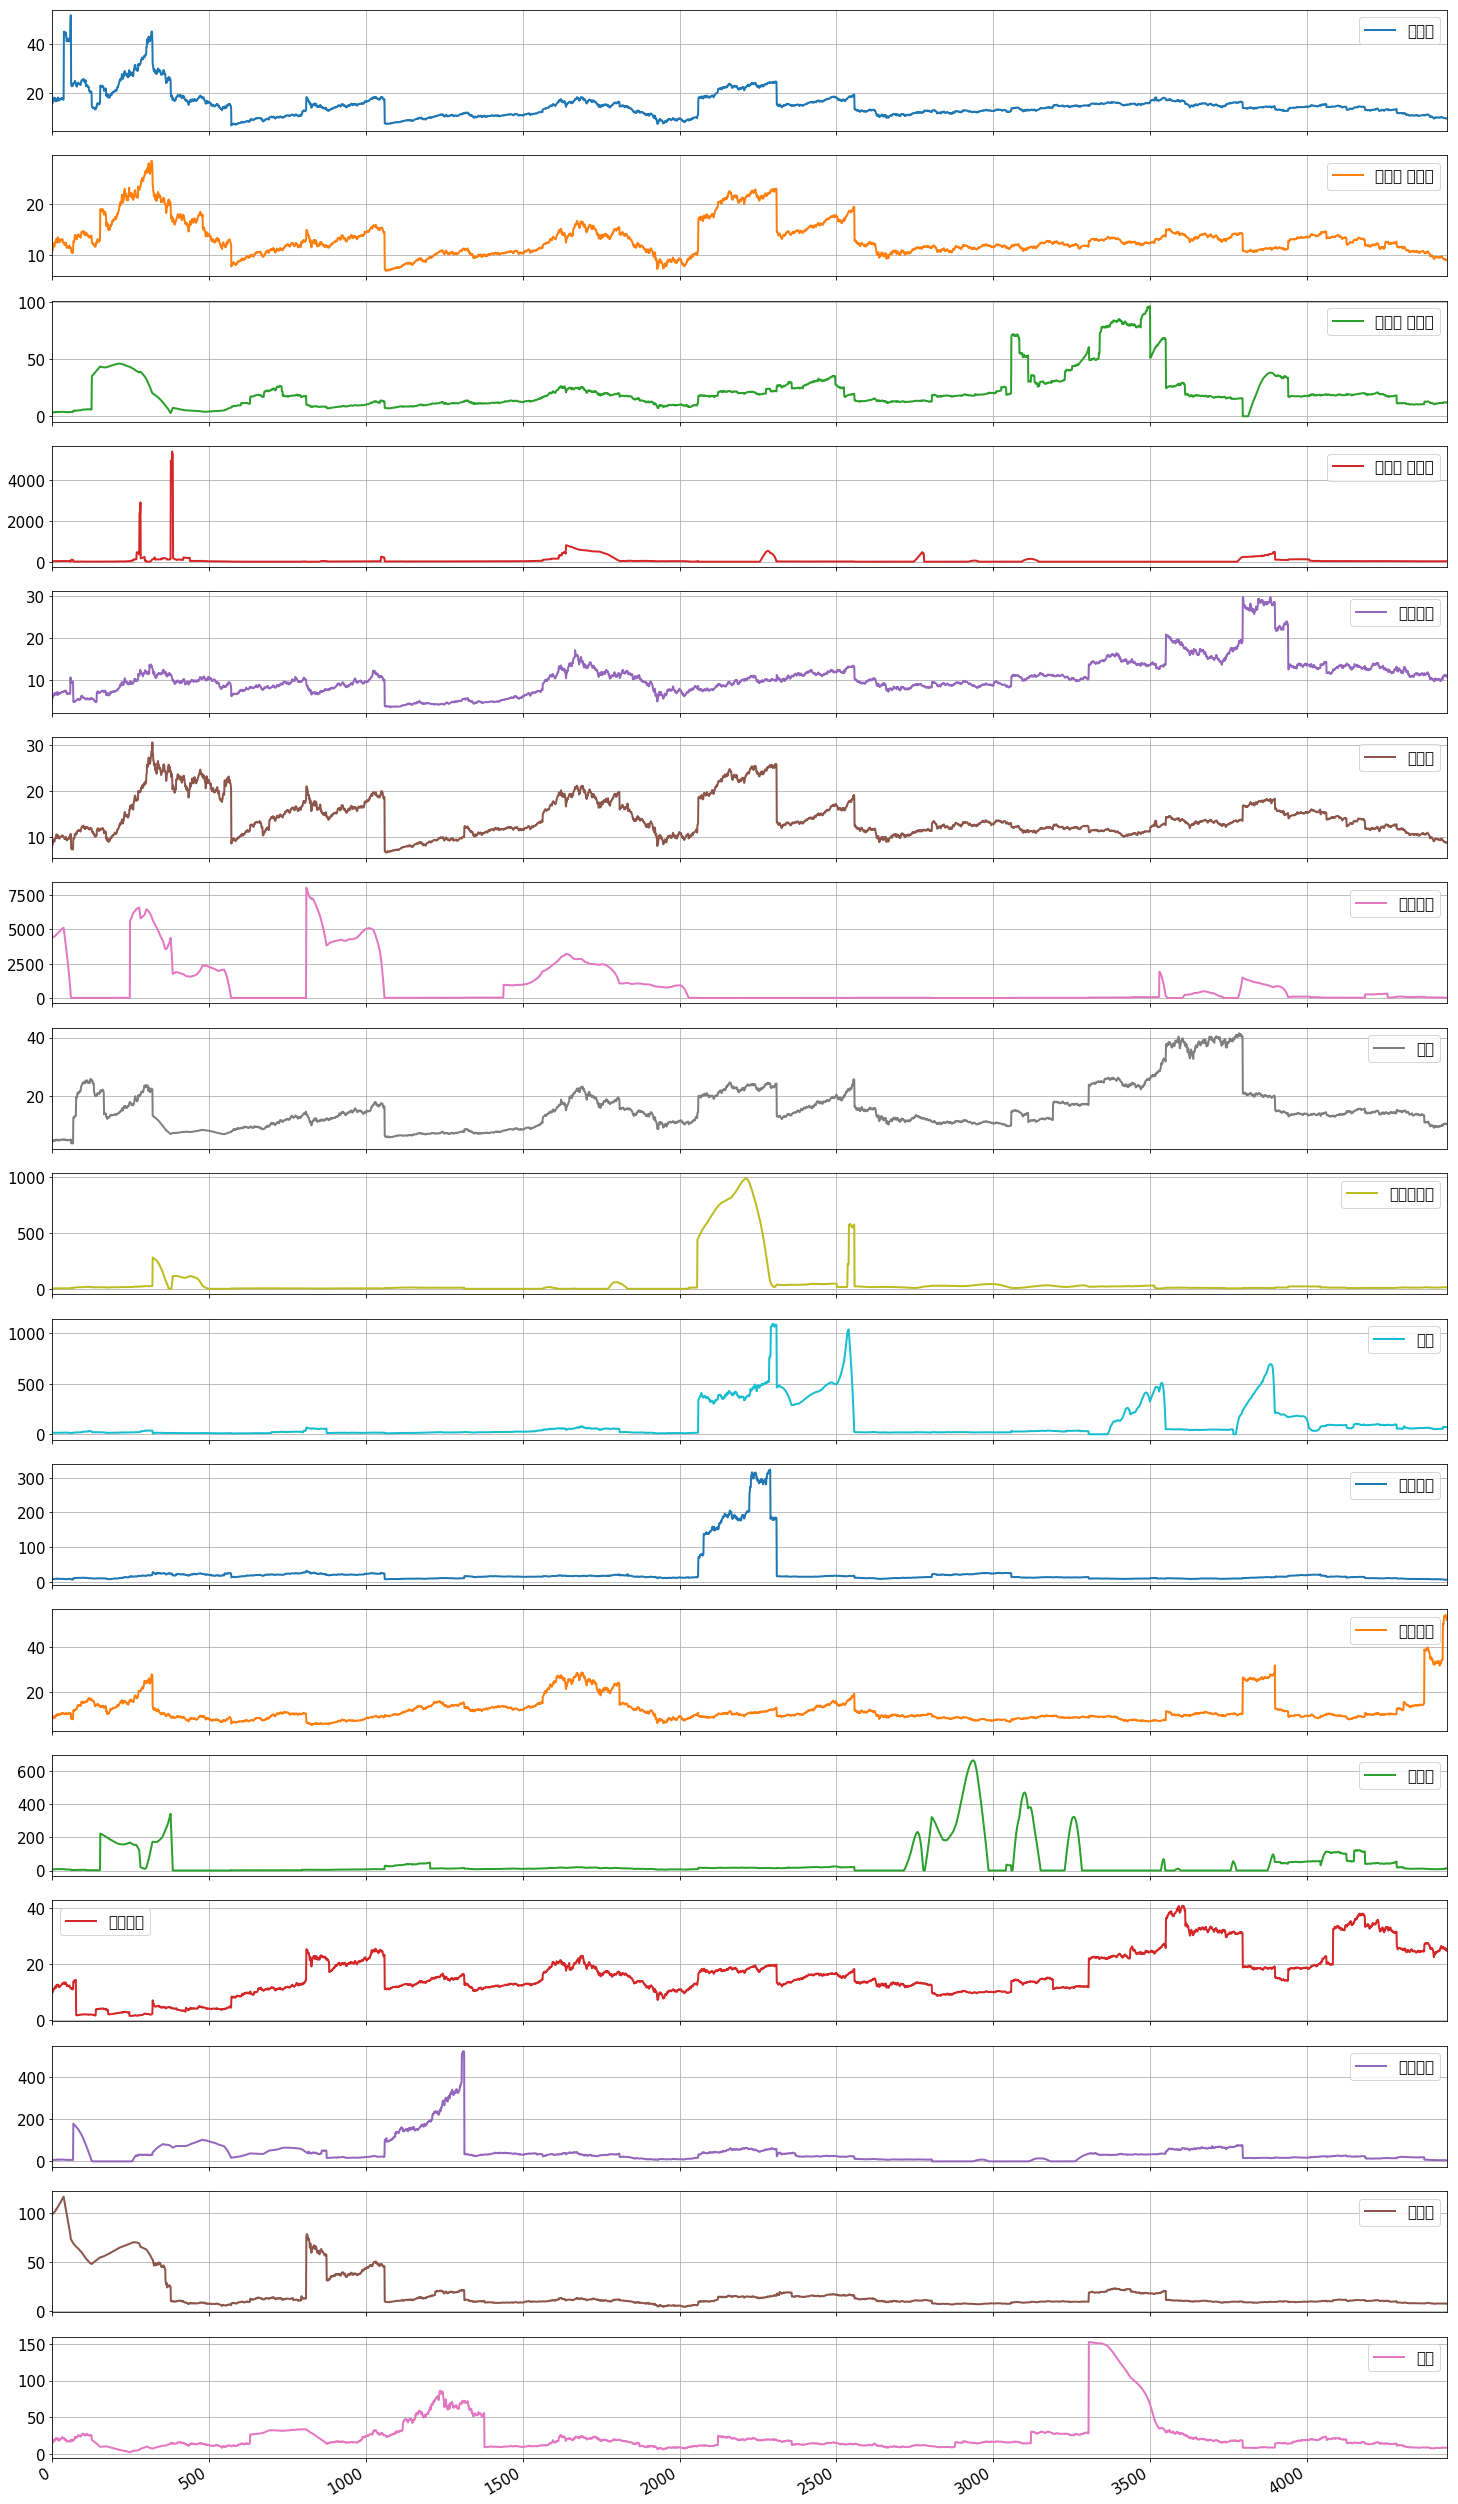

In [1414]:
# 결측치 처리한 최종 per 그래프
plb.rcParams["figure.figsize"] = (25,50)
per_VAR.iloc[:,1:].plot(subplots = True)

- 1~4번째 변수 **코스피**, **코스피 대형주**, **코스피 중형주**, **코스피 소형주**를 비교한 결과, 똑같은 코스피인데도 대형주는 코스피 지수에 큰 영향을 주는 걸로 보이는 반면, 나머지 중형주와 소형주의 영향력은 다소 낮은 것을 확인할 수 있다.
- 9번째~11번째 변수 **비금속광물*, **기계**, **전기전자**의 결측치를 VAR 예측값으로 채운 결과, 비슷한 시기에 per 지수가 급증하는 분포를 보인다. 따라서 해당 3가지의 변수는 강한 상관관계가 있음을 확인할 수 있다. 원본데이터와 예측치로 결측값을 대체한 데이터의 분포를 비교해보면, 해당 시기의 **기계** 지수가 급증하는 흐름을 보이자 이에 영향을 받은 **비금속광물**과 **전기전자**지수가 **기계**지수의 흐름을 반영하여 결측값을 예측했다.

#### 원본데이터와 비교해보기

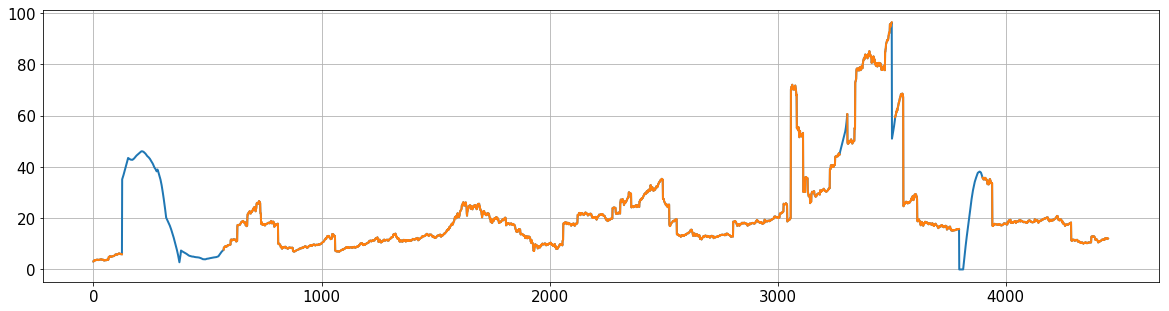

In [1413]:
#코스피 중형주
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['코스피 중형주']])
plt.plot(per_eda[['코스피 중형주']])
plt.show()

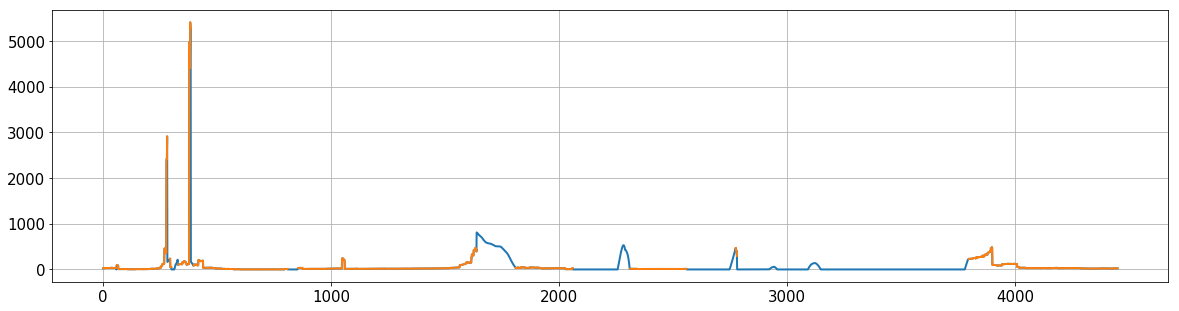

In [1396]:
#코스피 소형주
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['코스피 소형주']])
plt.plot(per_eda[['코스피 소형주']])
plt.show()

In [1395]:
### 이상치 확인하기
per_eda[per_eda['코스피 소형주']>2000]

날짜    코스피  코스피 대형주  코스피 중형주  코스피 소형주   철강금속    제조업  종이목재     화학  \
278  2002-02-20  31.29    22.78      NaN  2374.61  11.21  19.74   NaN  19.76   
279  2002-02-21  31.71    23.17      NaN  2423.44  11.44  19.85   NaN  20.20   
280  2002-02-22  31.90    23.37      NaN  2415.25  12.41  19.92   NaN  20.18   
281  2002-02-25  31.86    23.32      NaN  2909.60  12.19  19.80   NaN  20.17   
378  2002-07-19  19.34    17.88      NaN  4971.28  11.24  24.10   NaN    NaN   
379  2002-07-22  18.48    17.12      NaN  4408.33  11.20  23.02   NaN    NaN   
380  2002-07-23  19.07    17.68      NaN  4518.00  11.01  23.80   NaN    NaN   
381  2002-07-24  18.48    17.12      NaN  4406.96  10.63  23.10   NaN    NaN   
382  2002-07-25  18.54    17.15      NaN  5408.35  10.37  23.18   NaN    NaN   
383  2002-07-26  17.22    16.47      NaN  5315.97  10.08  20.34   NaN    NaN   
384  2002-07-29  17.30    16.60      NaN  5268.91   9.75  20.51   NaN    NaN   

     비금속광물     기계   전기전자   운수장비  건설업  서비스업   의료정밀    금융업     증권  
278  20.58  21.39  16.13  20.44  NaN  1.82  32.19    NaN    NaN  
279  21.05  21.63  16.04  20.60  NaN  1.86  31.77    NaN    NaN  
280  21.03  21.40  15.90  20.40  NaN  1.88  30.65    NaN    NaN  
281  21.06  22.05  15.79  20.32  NaN  1.86  29.49    NaN    NaN  
378    NaN  13.39  23.01   8.99  NaN  4.56    NaN  10.70  14.79  
379    NaN  12.53  21.91   8.61  NaN  4.36    NaN  10.21  13.79  
380    NaN  13.09  22.80   9.11  NaN  4.56    NaN  10.59  14.52  
381    NaN  12.62  22.07   8.92  NaN  4.33    NaN  10.25  14.05  
382    NaN  12.72  22.31   8.81  NaN  4.33    NaN  10.34  14.28  
383    NaN  12.53  17.84   8.55  NaN  4.24    NaN  10.05  13.90  
384    NaN  12.46  18.14   8.63  NaN  4.23    NaN  10.01  13.72

> 이상치가 아닌 것으로 판단

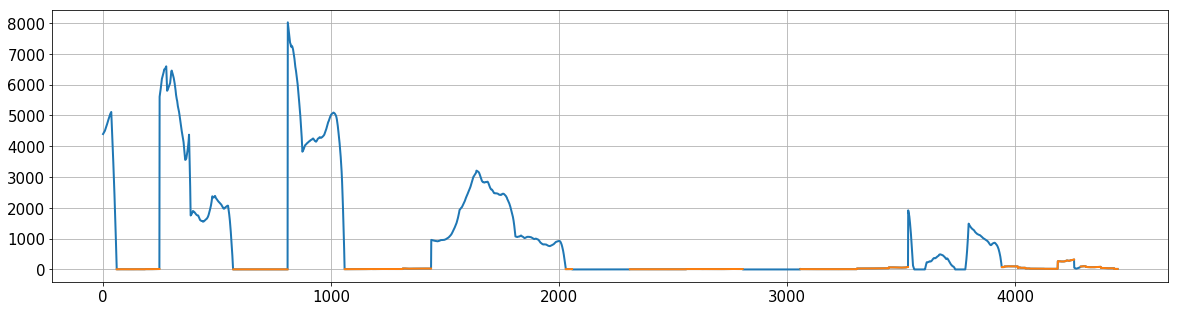

In [1412]:
#종이목재 
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['종이목재']])
plt.plot(per_eda[['종이목재']])
plt.show()

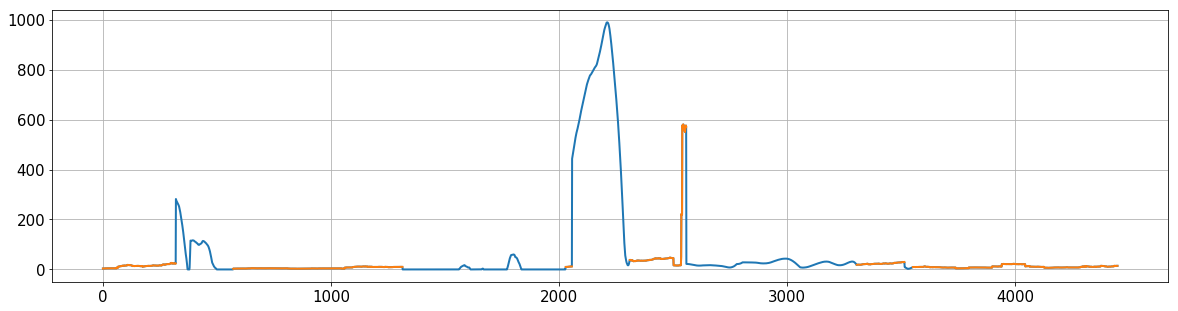

In [1411]:
#비금속광물 
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['비금속광물']])
plt.plot(per_eda[['비금속광물']])
plt.show()

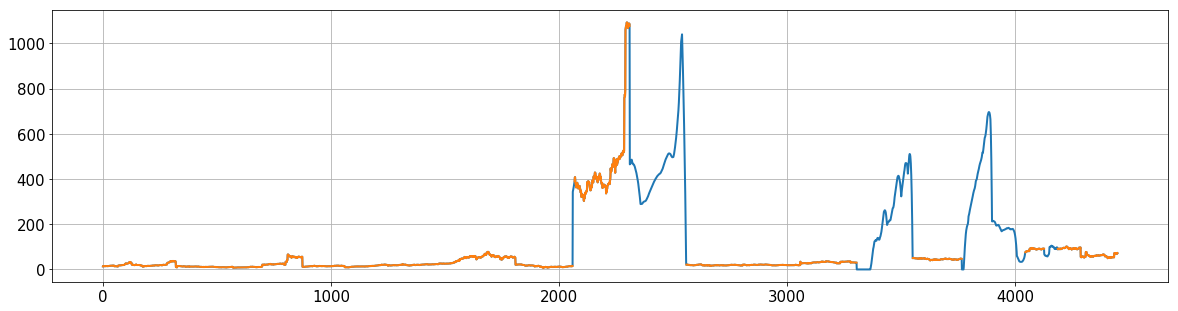

In [1410]:
#기계 
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['기계']])
plt.plot(per_eda[['기계']])
plt.show()

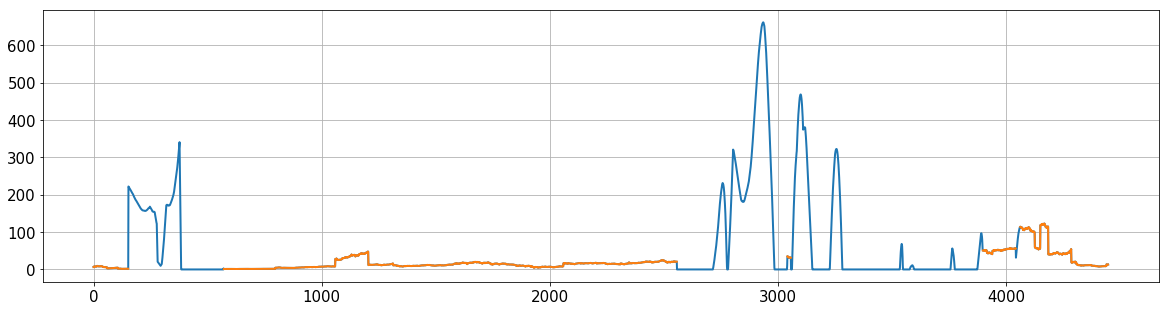

In [1409]:
#건설업 
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['건설업']])
plt.plot(per_eda[['건설업']])
plt.show()

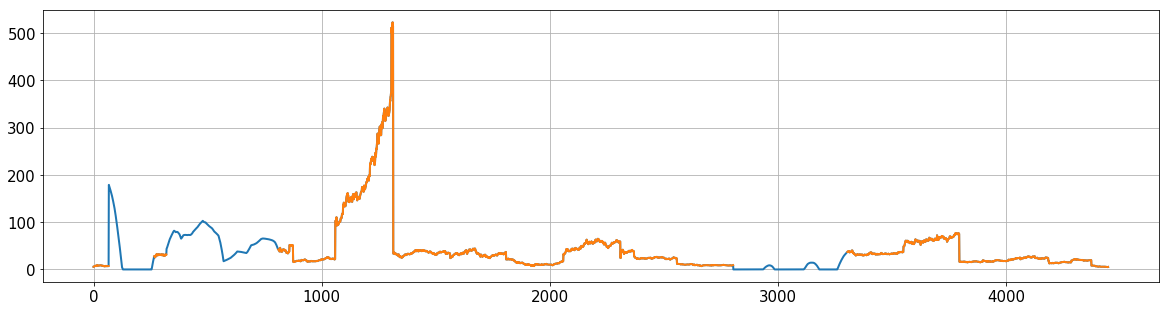

In [1408]:
#의료정밀 
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['의료정밀']])
plt.plot(per_eda[['의료정밀']])
plt.show()

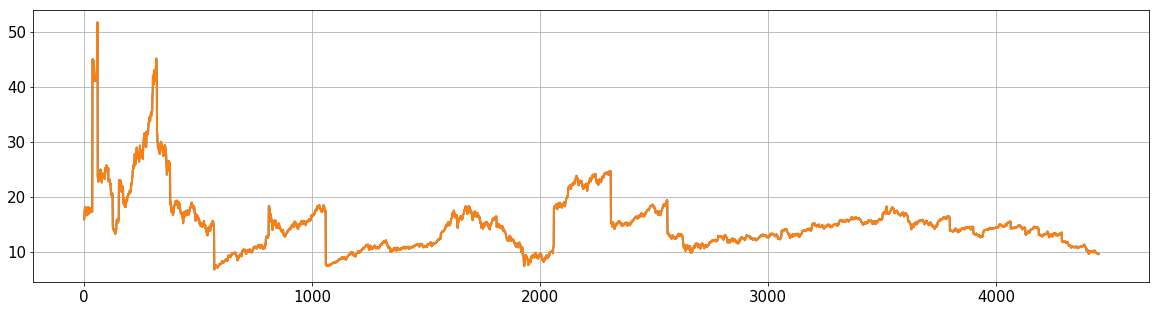

In [1407]:
#코스피
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['코스피']])
plt.plot(per_eda[['코스피']])
plt.show()

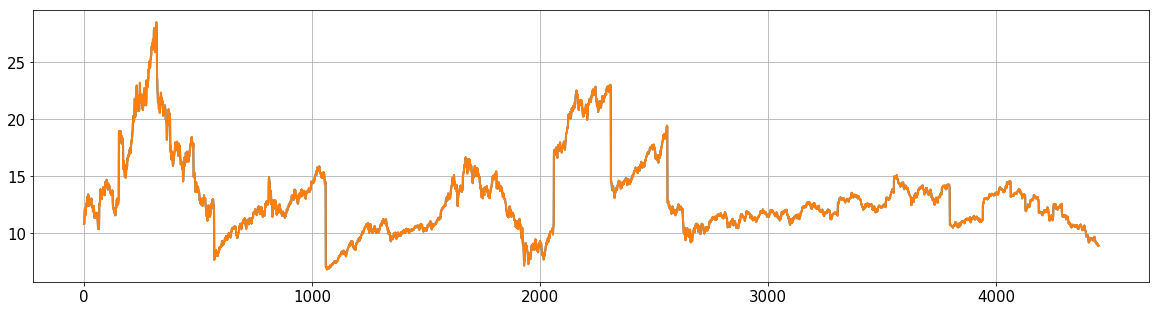

In [1406]:
#코스피 대형주
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['코스피 대형주']])
plt.plot(per_eda[['코스피 대형주']])
plt.show()

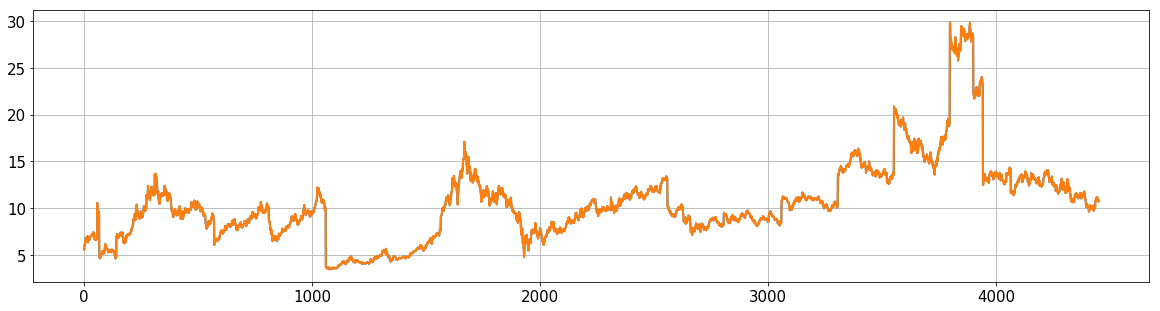

In [1405]:
#철강금속 
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['철강금속']])
plt.plot(per_eda[['철강금속']])
plt.show()

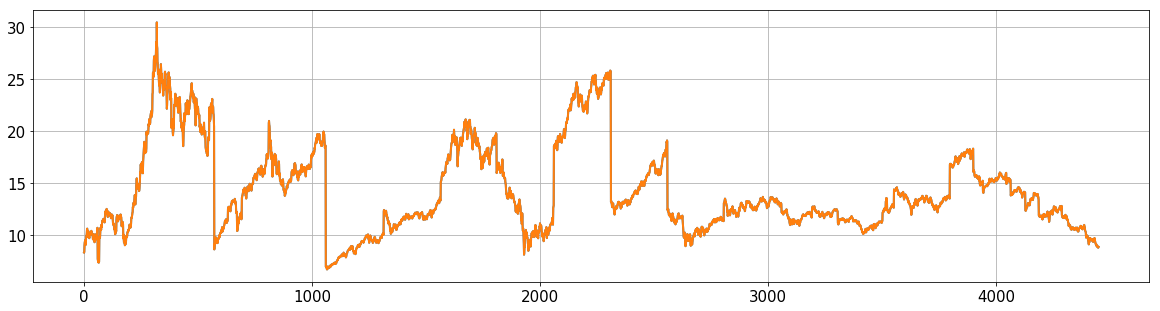

In [1404]:
#제조업
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['제조업']])
plt.plot(per_eda[['제조업']])
plt.show()

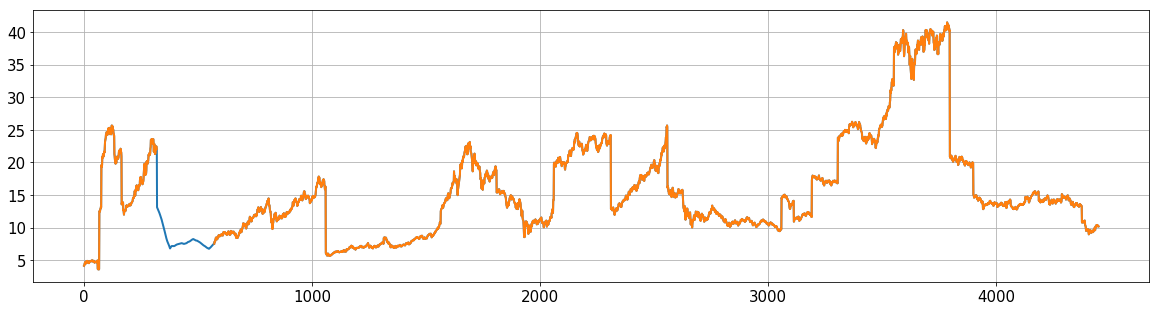

In [1403]:
#화학
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['화학']])
plt.plot(per_eda[['화학']])
plt.show()

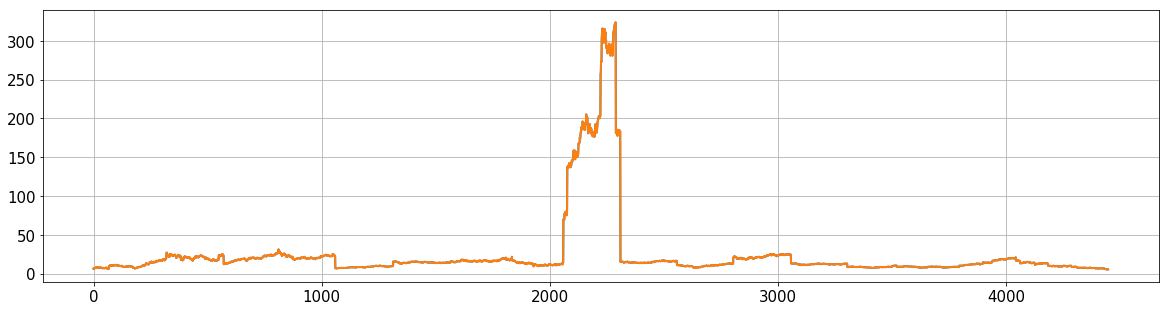

In [1402]:
#전기전자
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['전기전자']])
plt.plot(per_eda[['전기전자']])
plt.show()

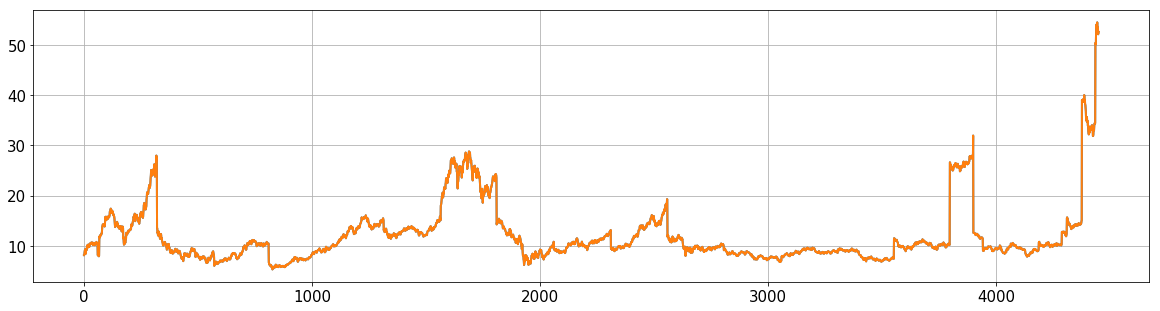

In [1401]:
#운수장비
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['운수장비']])
plt.plot(per_eda[['운수장비']])
plt.show()

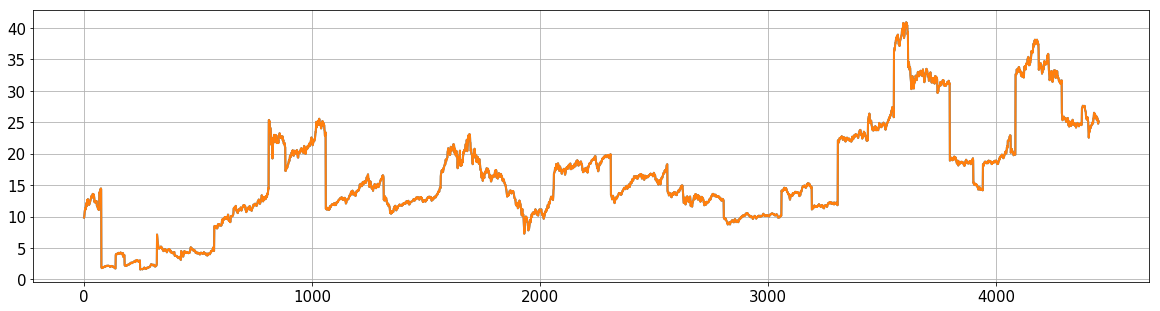

In [1400]:
#서비스업
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['서비스업']])
plt.plot(per_eda[['서비스업']])
plt.show()

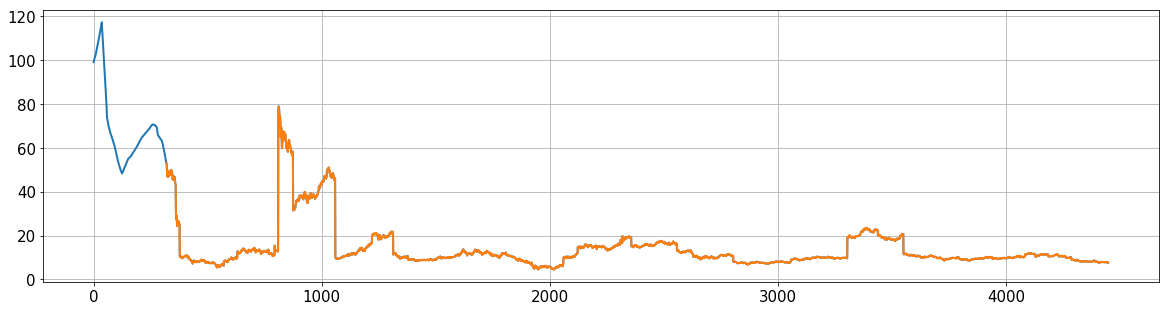

In [1399]:
#금융업
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['금융업']])
plt.plot(per_eda[['금융업']])
plt.show()

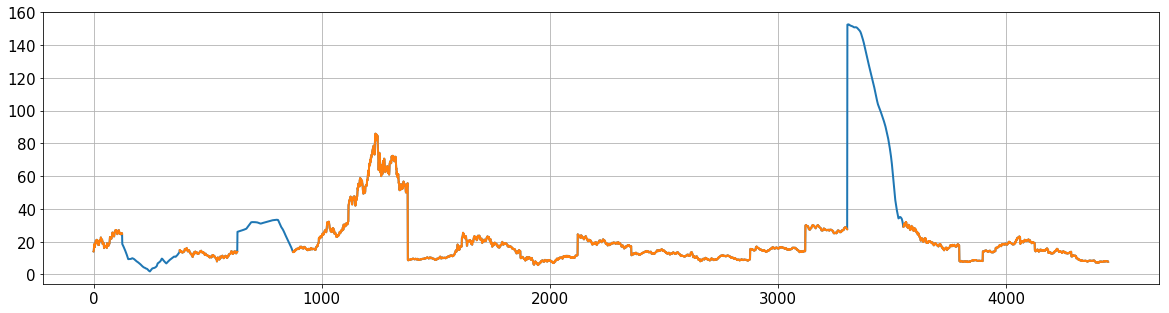

In [1398]:
#증권
plb.rcParams["figure.figsize"] = (20,5)
plt.plot(per_VAR[['증권']])
plt.plot(per_eda[['증권']])
plt.show()

In [ ]:
per_VAR.to_csv('per_eda_final.csv',index = False, encoding = 'euc-kr')